In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-66cee067-7ea9-c0be-abca-55a87737e95c)


# Import Dataset

In [2]:
import pandas as pd

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-12-14 11:34:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.003s  

2022-12-14 11:34:54 (65.9 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [4]:
prices_df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                     parse_dates=['Date'],
                     index_col=['Date'])

In [5]:
prices_df.head(20)

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566
2013-10-06,BTC,120.65533,121.33866,121.85216,120.55450
2013-10-07,BTC,121.79500,120.65533,121.99166,120.43199
2013-10-08,BTC,123.03300,121.79500,123.64016,121.35066
2013-10-09,BTC,124.04900,123.03300,124.78350,122.59266


In [6]:
prices_df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [7]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [8]:
df = pd.DataFrame(prices_df['Closing Price (USD)']).rename(columns={'Closing Price (USD)':'Price'})

In [9]:
df.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


# Plot prices


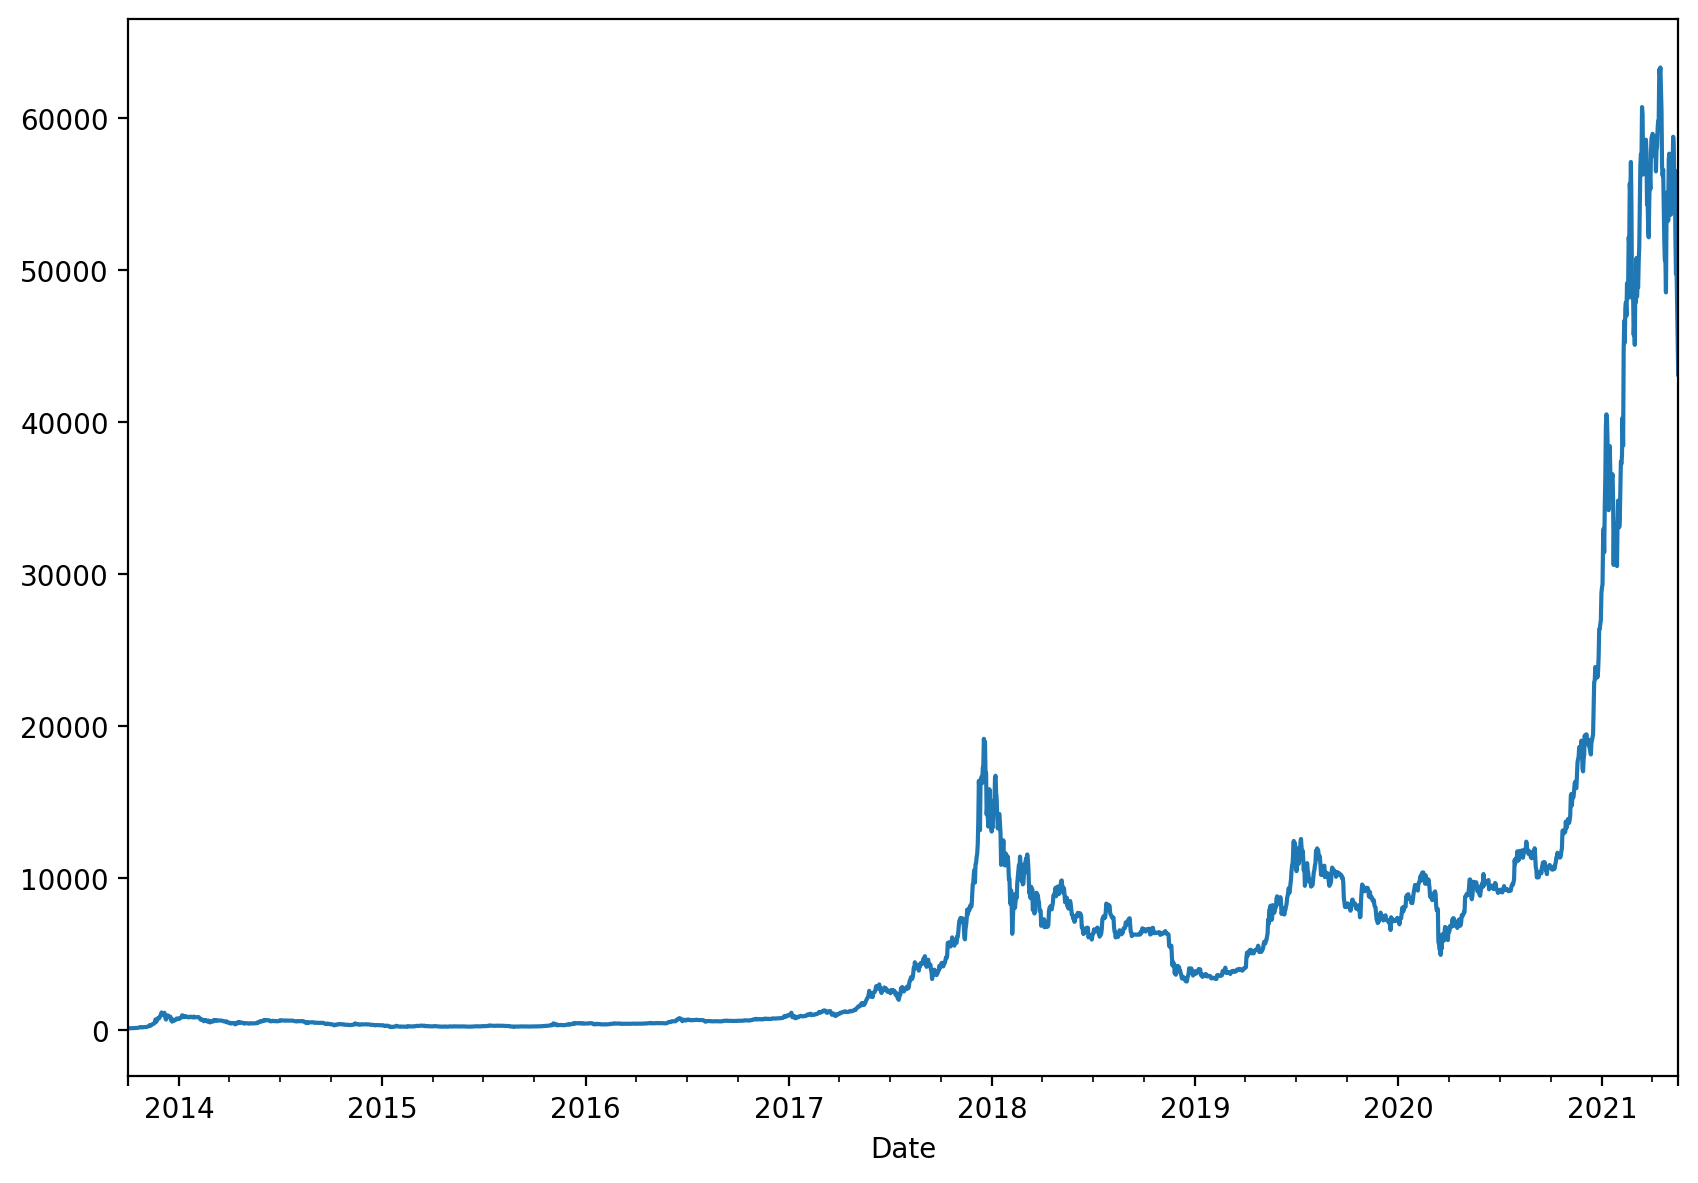

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7), dpi=200)
df['Price'].plot()

# Read and plot prices using the `csv` library

In [11]:
import csv
from datetime import datetime
timestamps = []
prices = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv') as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timestamps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    prices.append(float(line[2]))

In [12]:
print(timestamps[:10])
print(prices[:10])

[datetime.datetime(2013, 10, 1, 0, 0), datetime.datetime(2013, 10, 2, 0, 0), datetime.datetime(2013, 10, 3, 0, 0), datetime.datetime(2013, 10, 4, 0, 0), datetime.datetime(2013, 10, 5, 0, 0), datetime.datetime(2013, 10, 6, 0, 0), datetime.datetime(2013, 10, 7, 0, 0), datetime.datetime(2013, 10, 8, 0, 0), datetime.datetime(2013, 10, 9, 0, 0), datetime.datetime(2013, 10, 10, 0, 0)]
[123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795, 123.033, 124.049, 125.96116]


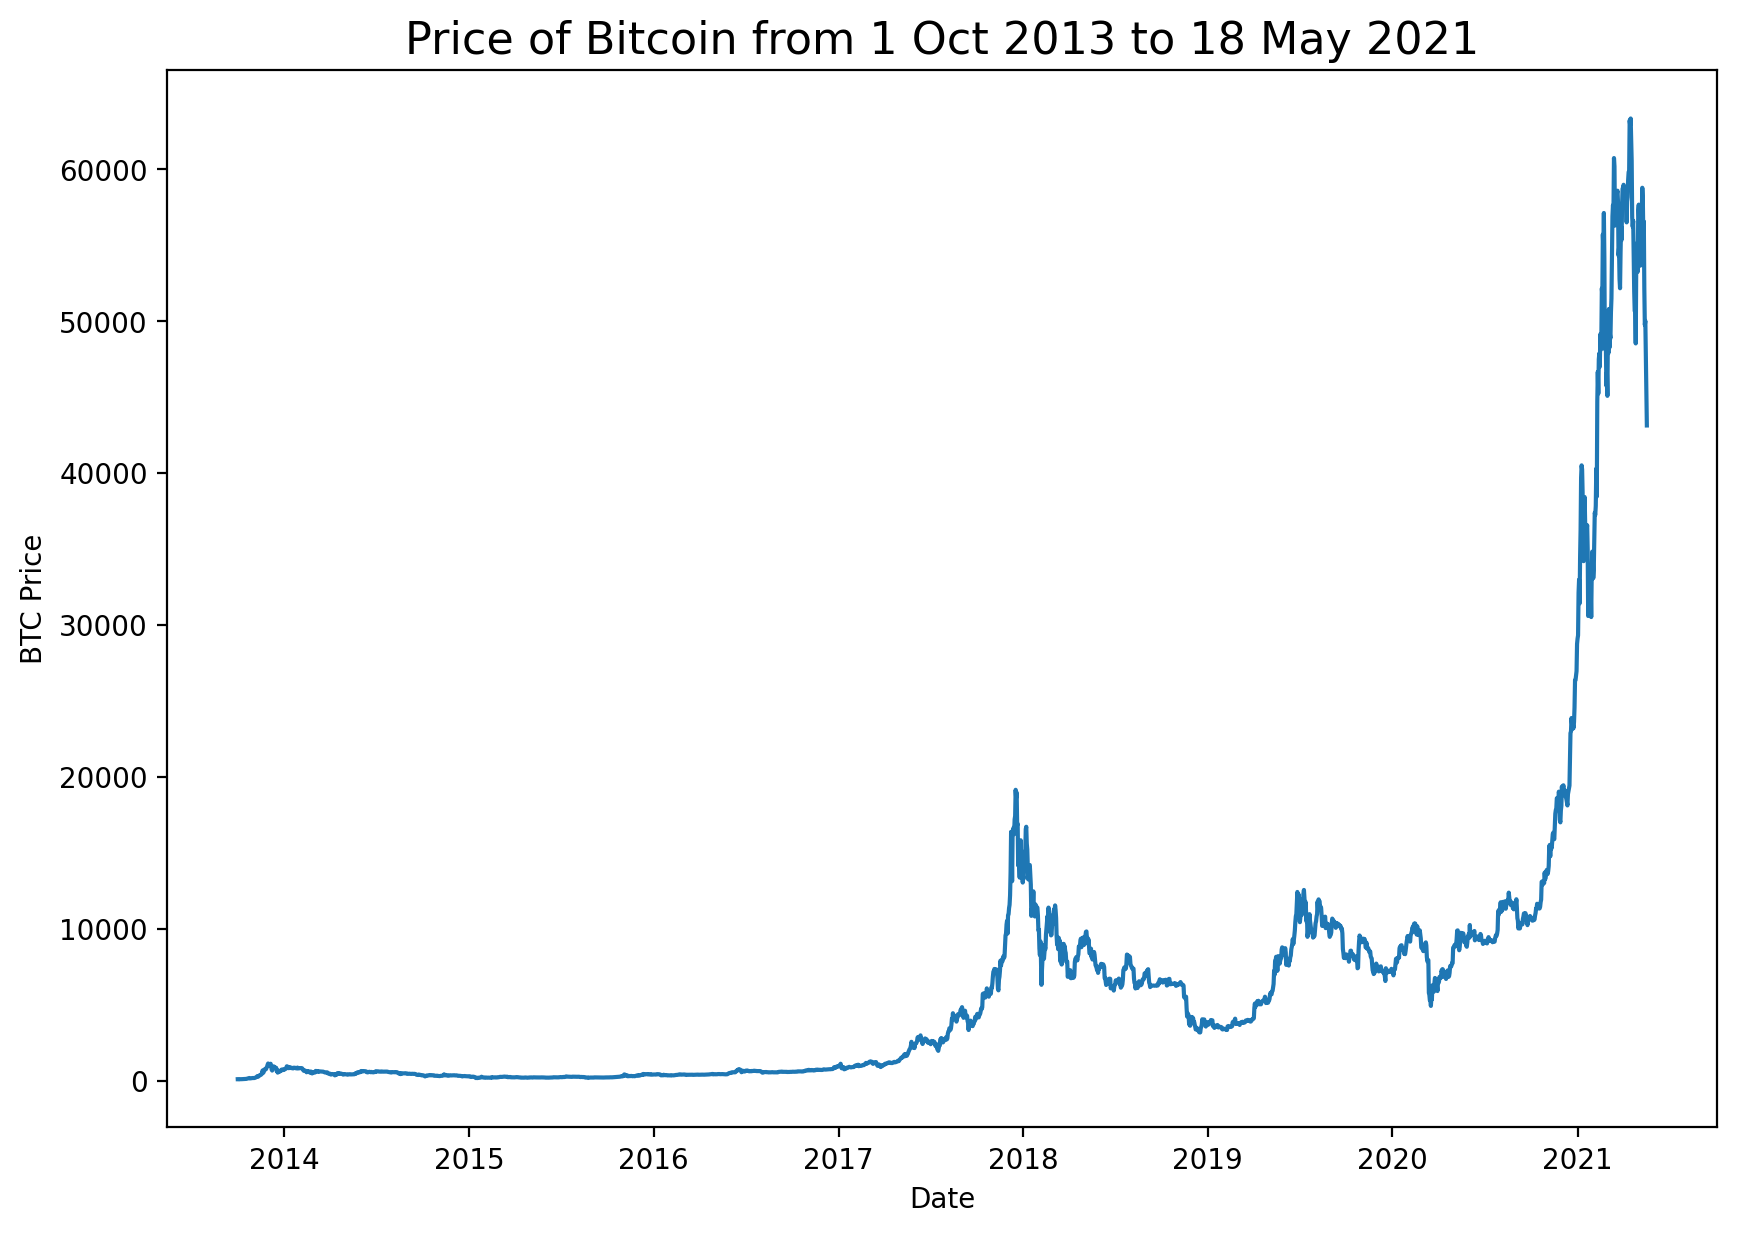

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7), dpi=200)
plt.plot(timestamps, prices)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

# Splitting the data into training and test sets

## Wrong Way

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
timestamps = df.index.to_numpy()
prices = df['Price'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(timestamps, prices, test_size=0.2, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

### Plotting the data 

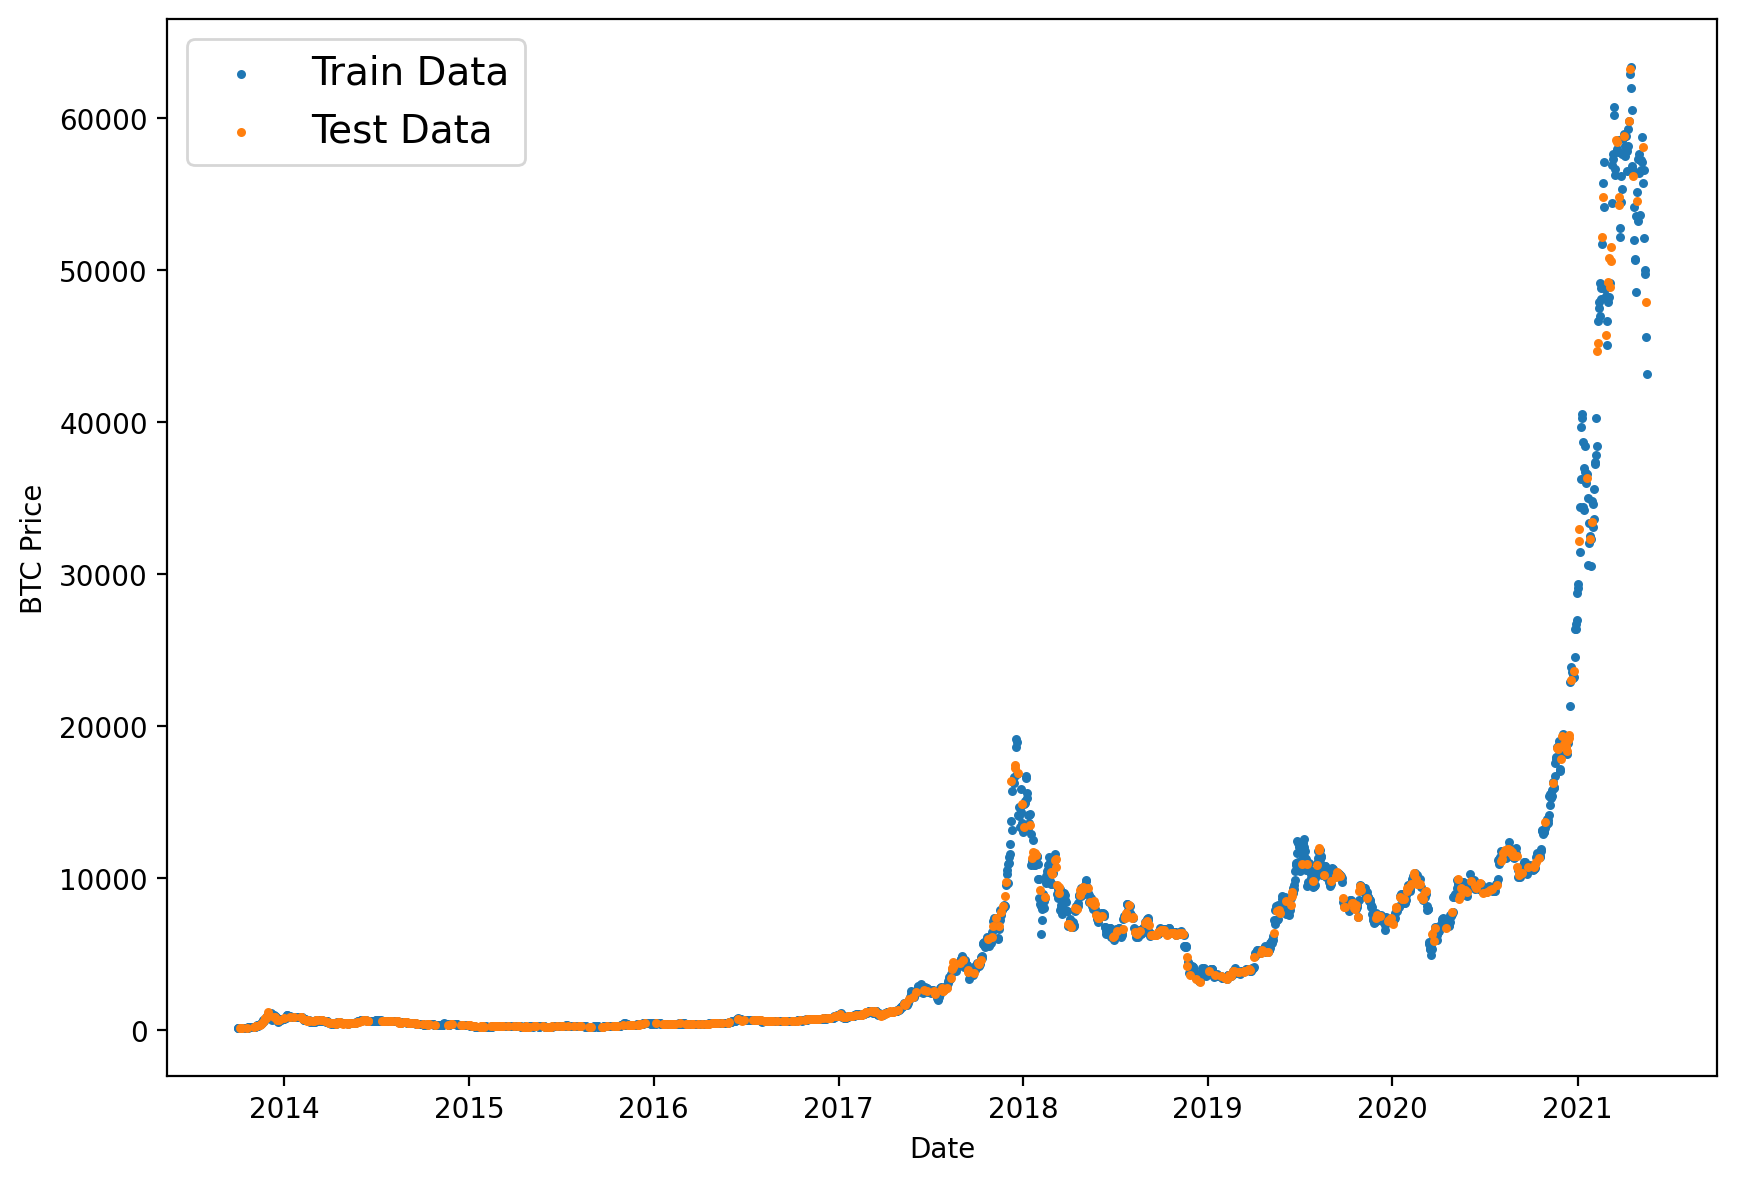

In [15]:
plt.figure(figsize=(10,7), dpi=200)
plt.scatter(X_train, y_train, s=5, label='Train Data')
plt.scatter(X_test, y_test, s=5, label='Test Data')
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

## The right way

In [16]:
split_size = int(0.8 * len(timestamps))

X_train, y_train = timestamps[:split_size], prices[:split_size]

X_test, y_test = timestamps[split_size:], prices[split_size:]

### Plotting the data

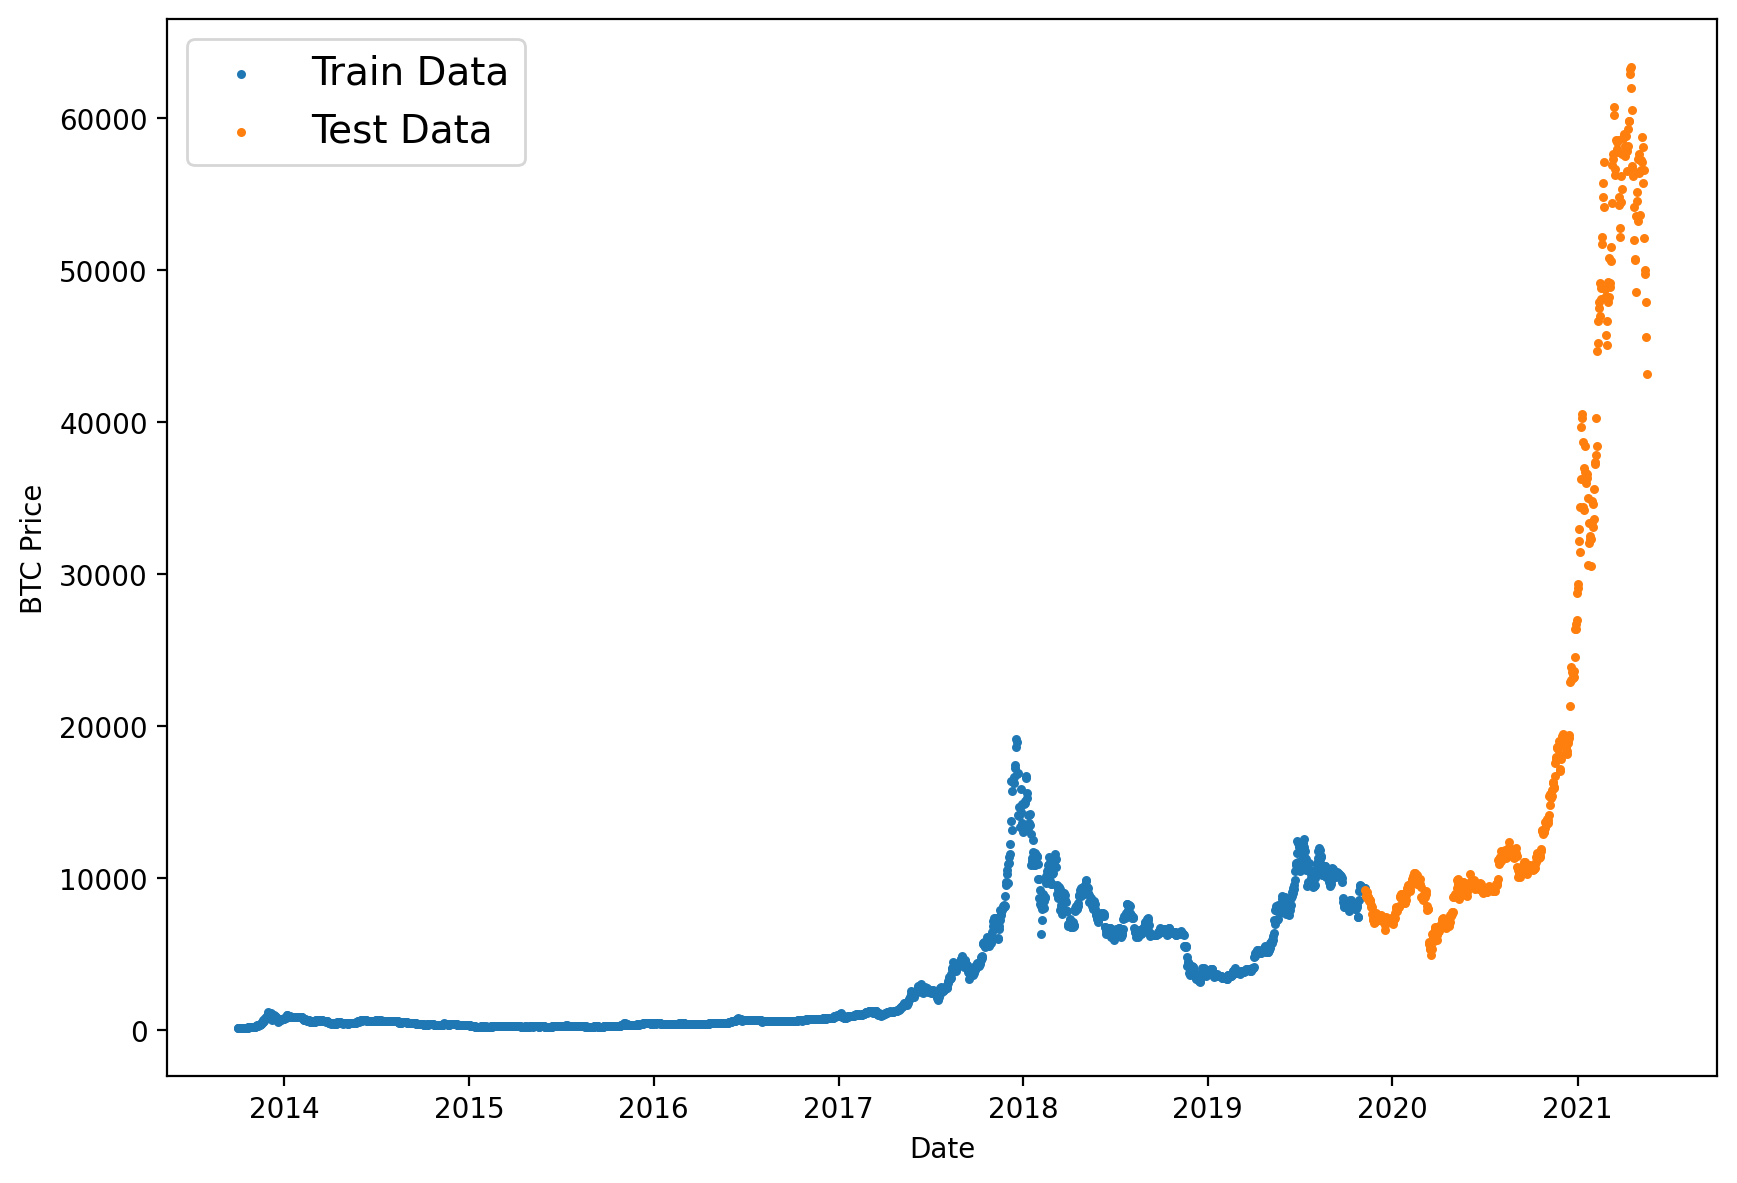

In [17]:
plt.figure(figsize=(10,7), dpi=200)
plt.scatter(X_train, y_train, s=5, label='Train Data')
plt.scatter(X_test, y_test, s=5, label='Test Data')
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

# Function for plotting the time series data

In [18]:
def plot_time_series(timesteps, prices, start=0, end=None, format='.', label=None):
  plt.plot(timesteps[start:end], prices[start:end], format, label=label)
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

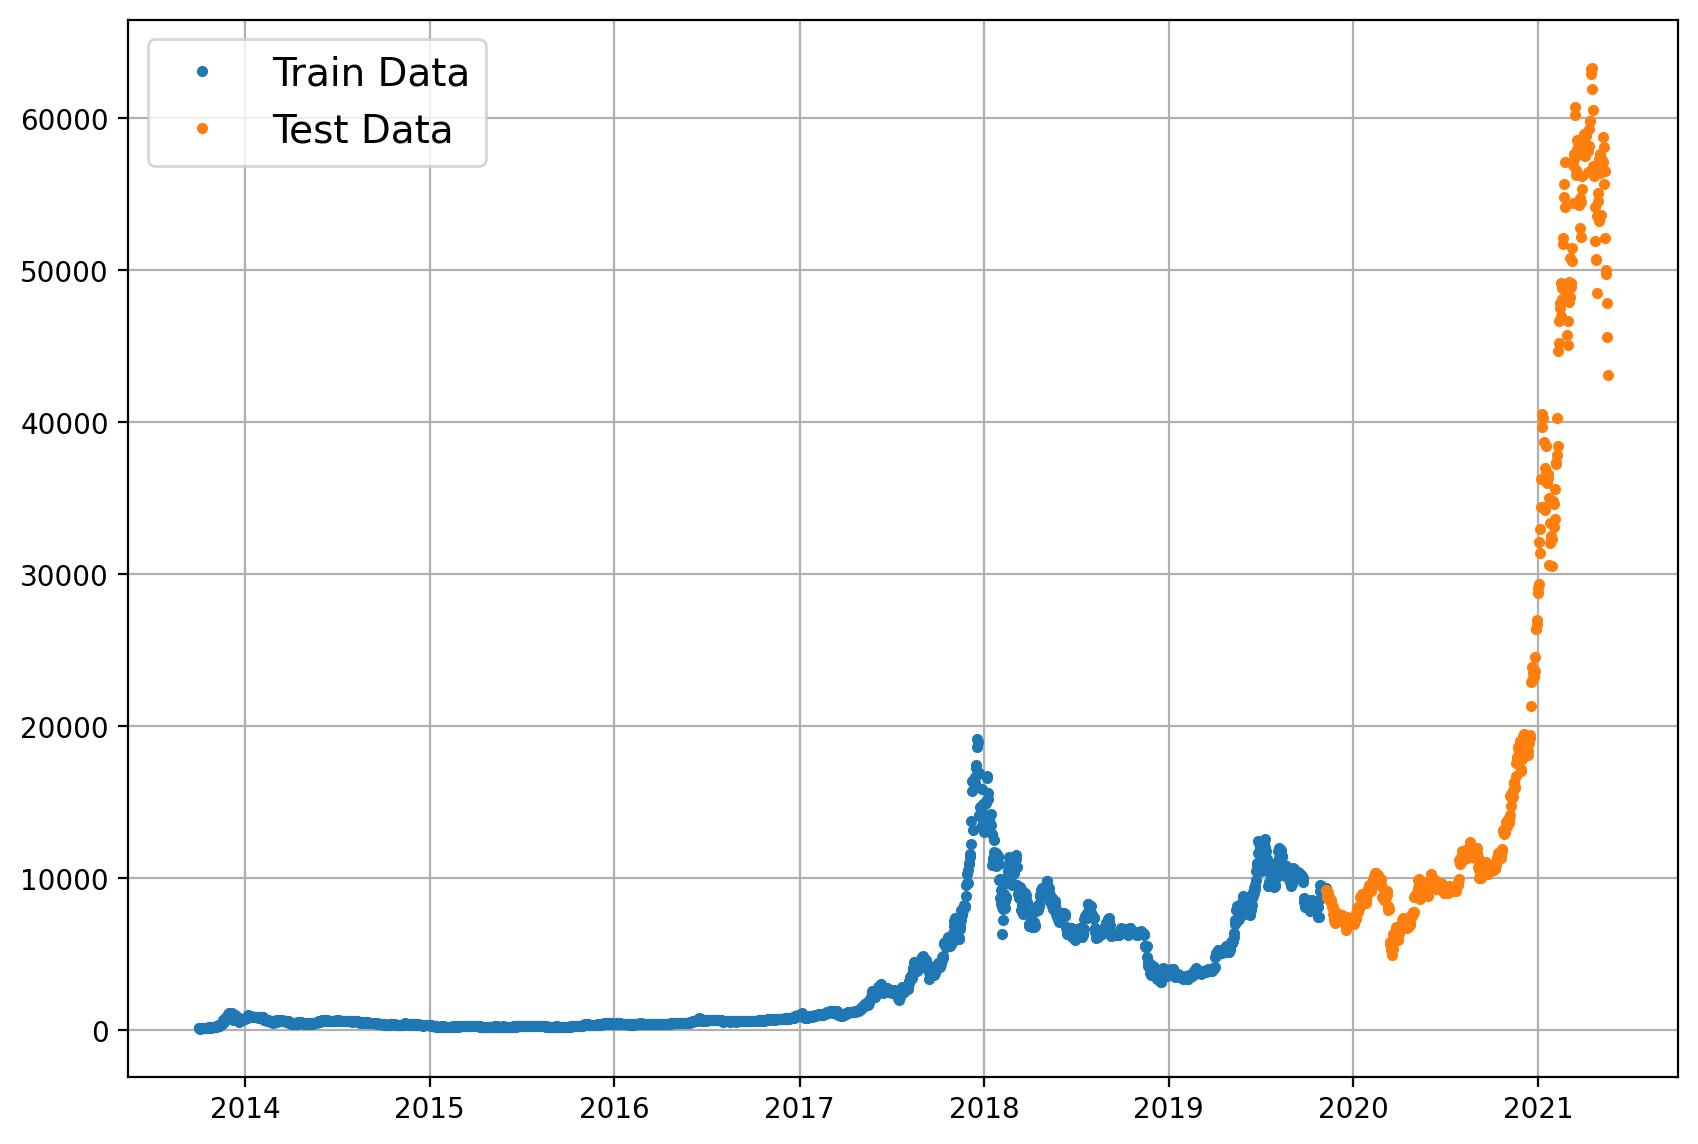

In [19]:
plt.figure(figsize=(10,7), dpi=200)
plot_time_series(X_train, y_train, label='Train Data')
plot_time_series(X_test, y_test, label='Test Data')

# Model 0 : Naive Model

In [20]:
naive_y = y_test[:-1]

In [21]:
naive_y[:10], naive_y[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [22]:
y_test[:10], y_test[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
        52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361, 43144.47129086]))

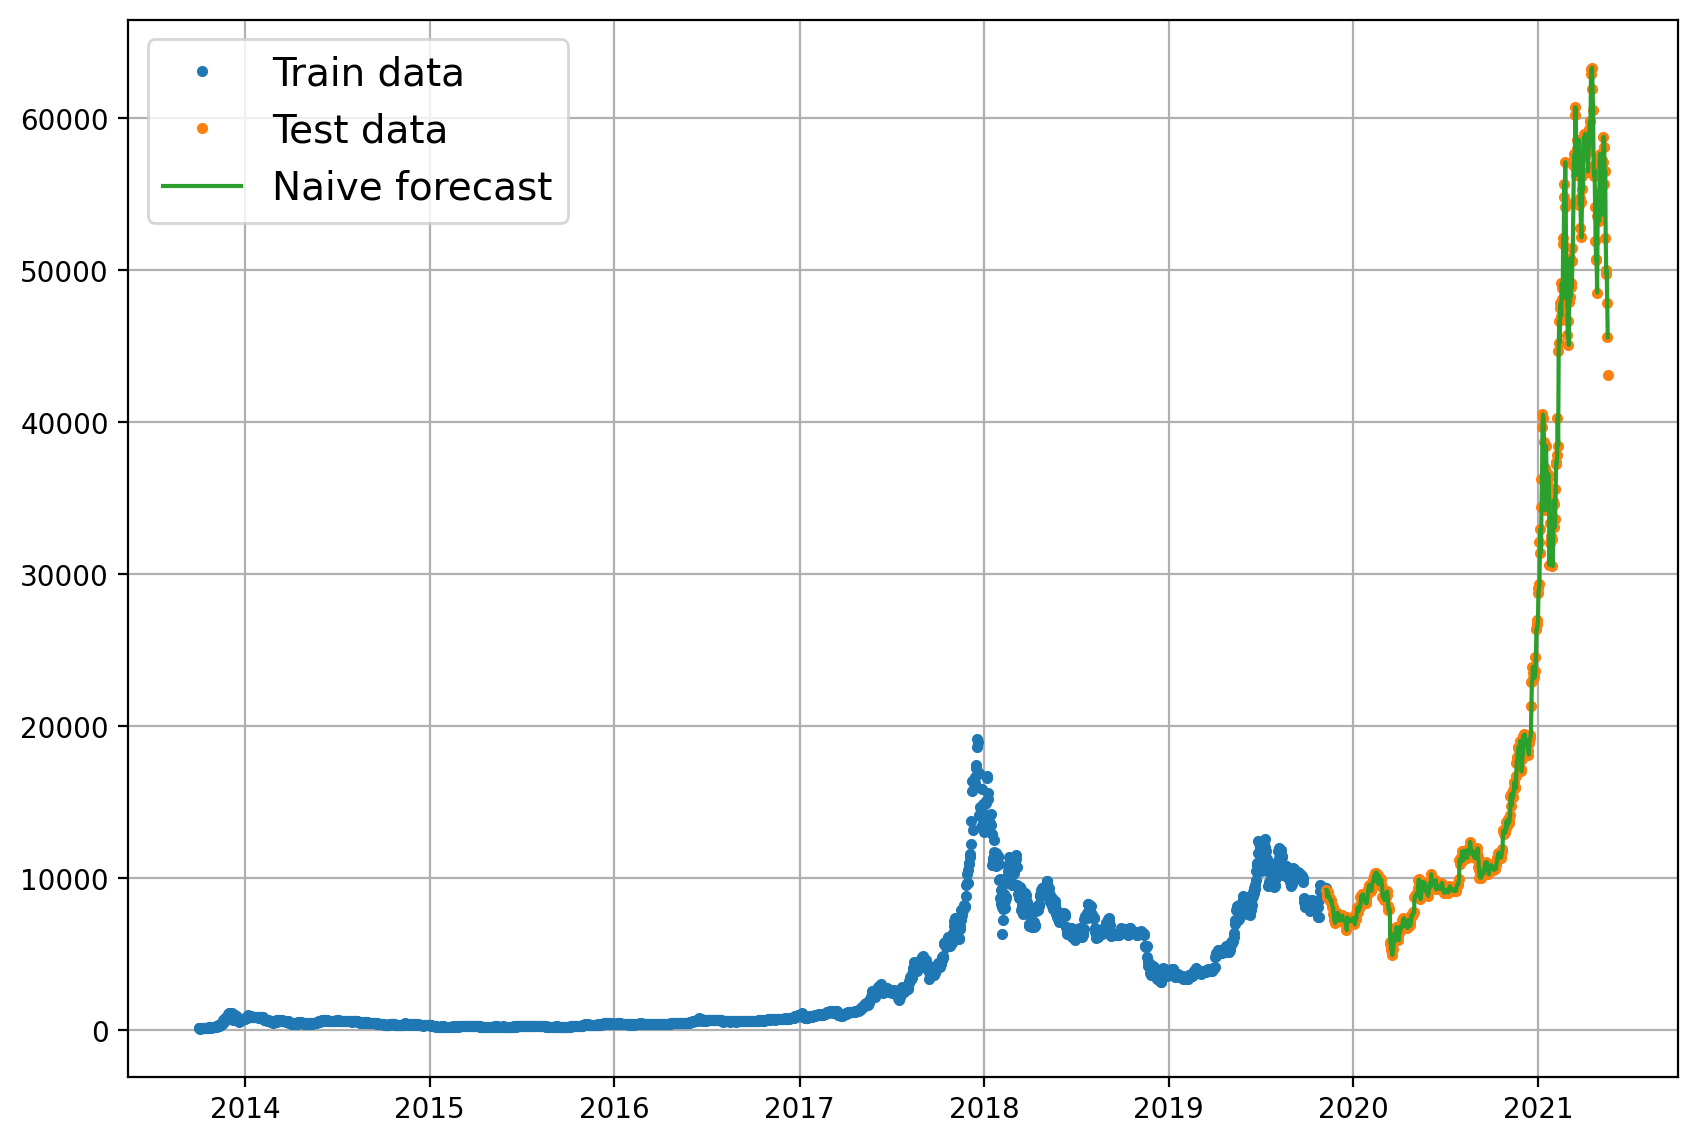

In [23]:
# Plot naive forecast
plt.figure(figsize=(10, 7), dpi=200)
plot_time_series(timesteps=X_train, prices=y_train, label="Train data")
plot_time_series(timesteps=X_test, prices=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], prices=naive_y, format="-", label="Naive forecast");

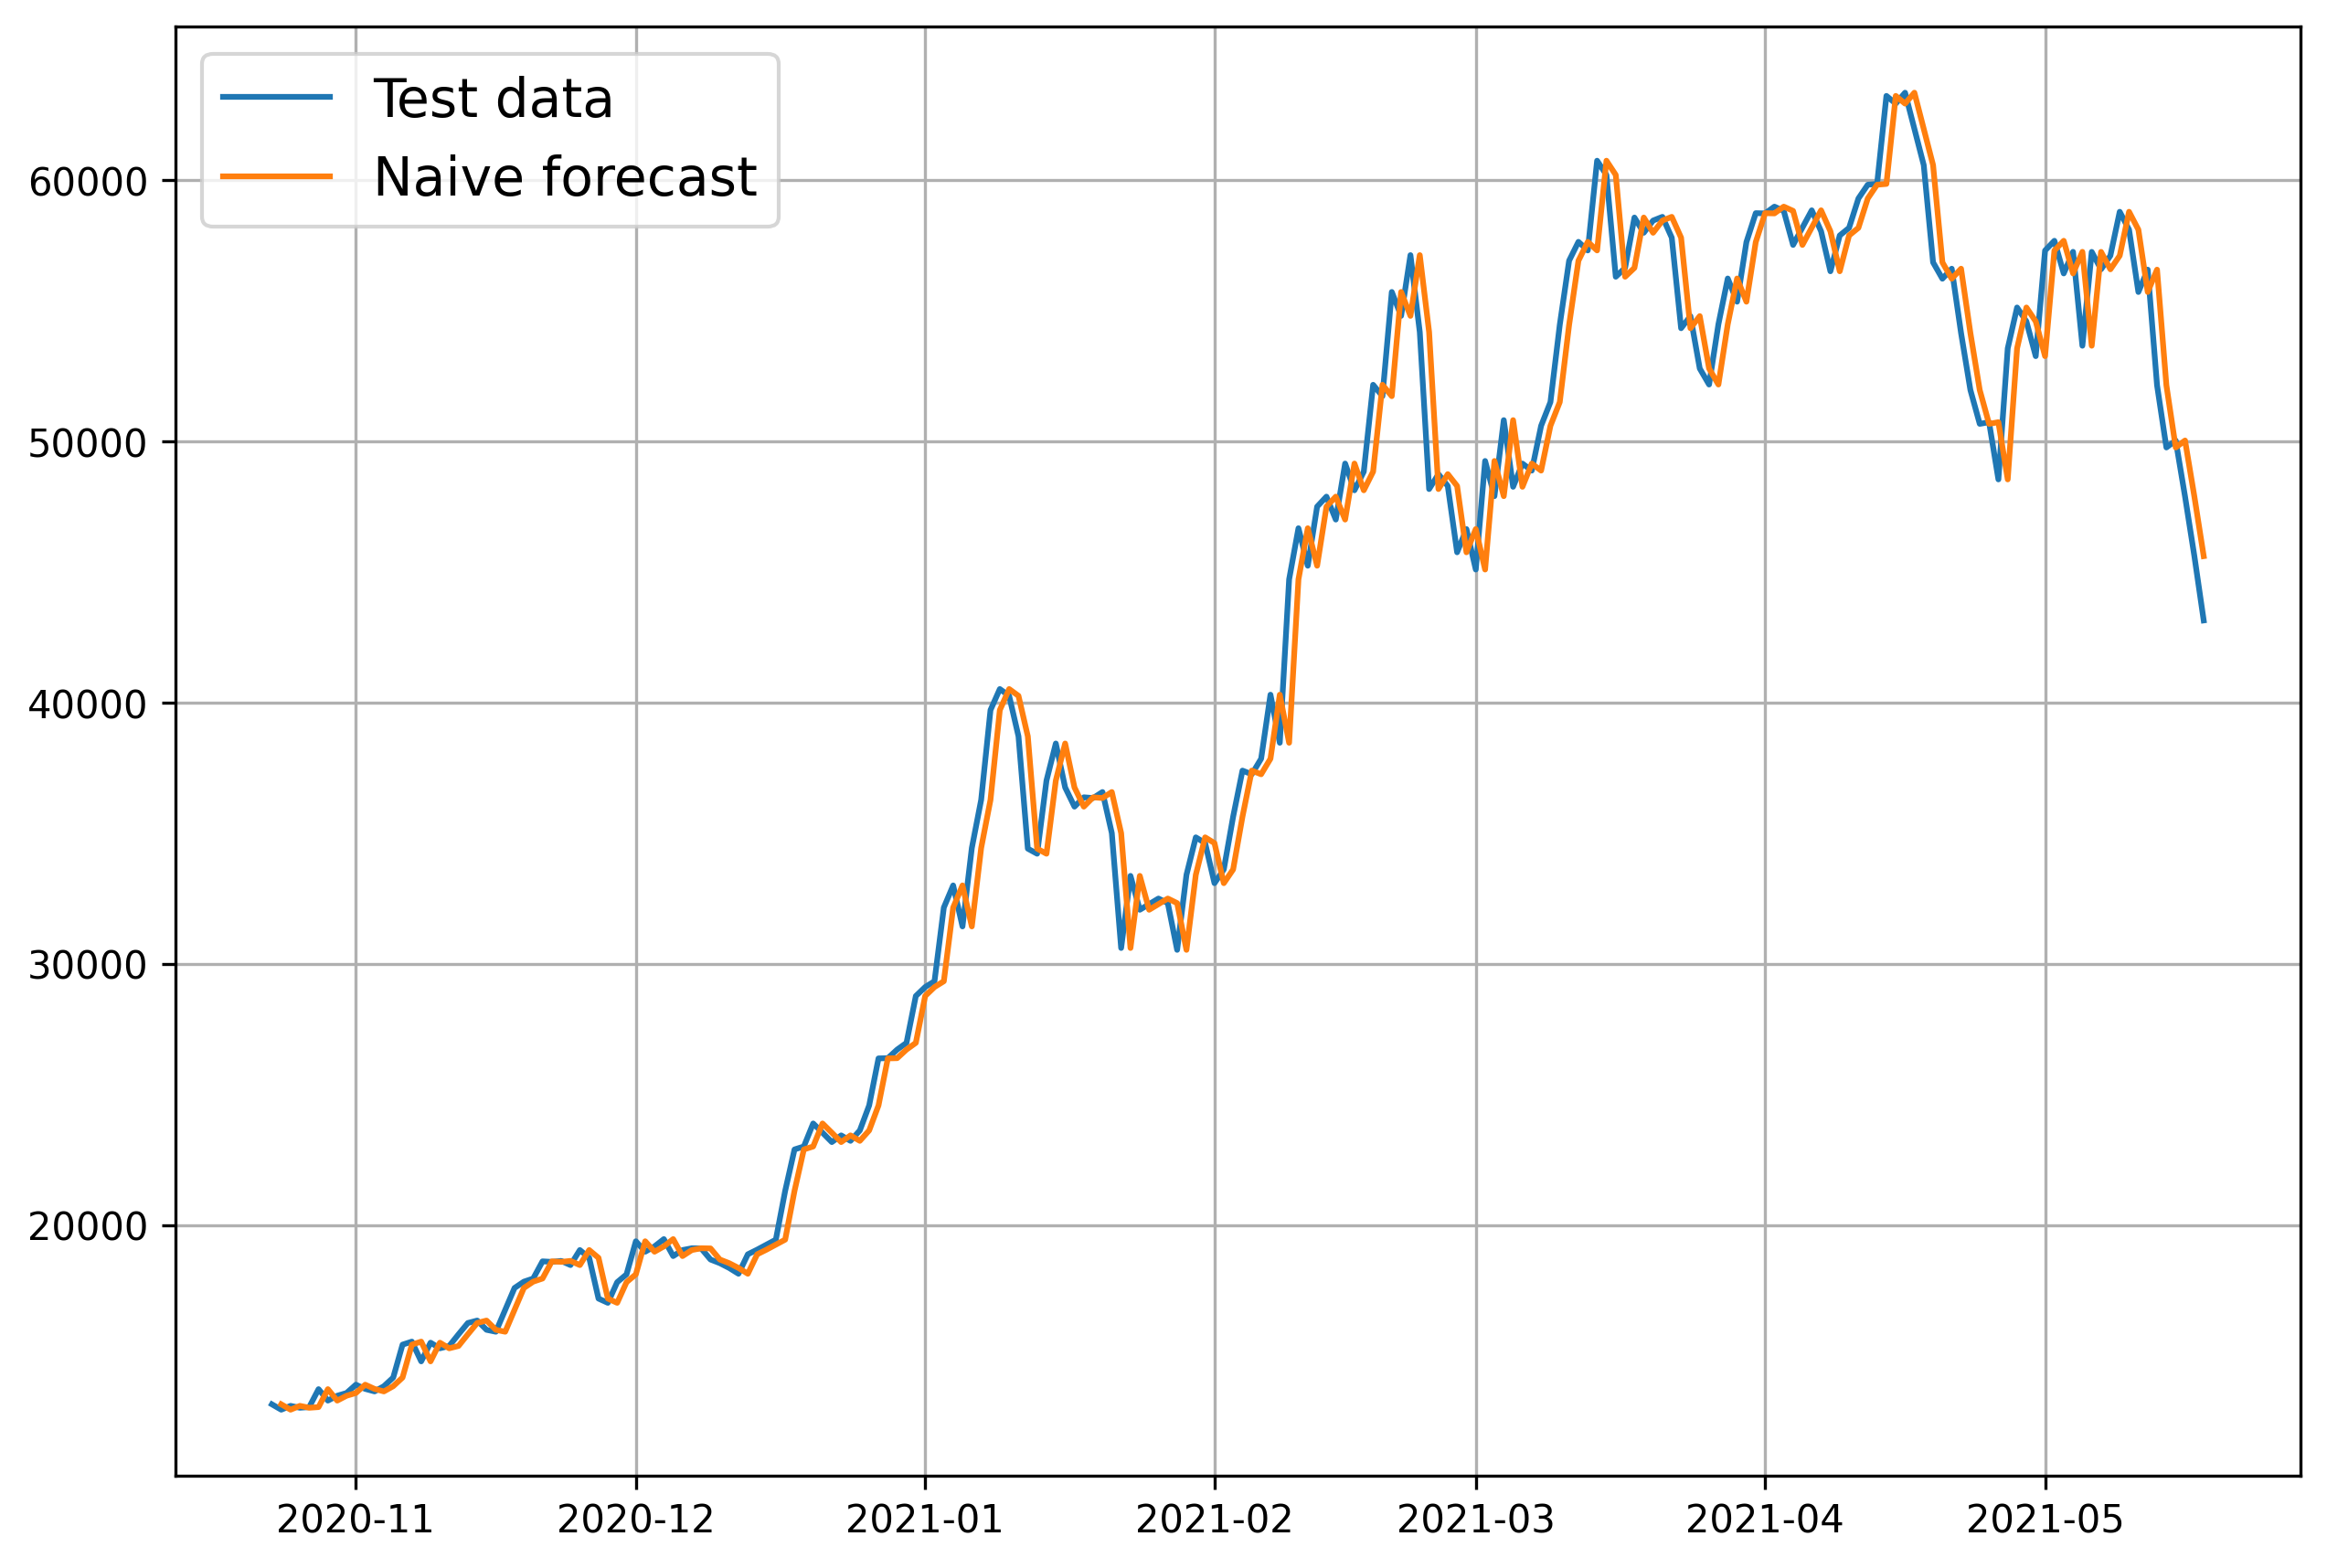

In [24]:
plt.figure(figsize=(10, 7), dpi=300)
plot_time_series(timesteps=X_test, prices=y_test, format="-", label="Test data", start=350)
plot_time_series(timesteps=X_test[1:], prices=naive_y, format="-", label="Naive forecast", start=350);

# Create function for evaluation

In [25]:
import tensorflow as tf

In [26]:
def MASE(y_true, y_preds):
  MAE = tf.reduce_mean(tf.abs(y_true - y_preds))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return MAE/mae_naive_no_season

In [27]:
MASE(y_test[1:], naive_y).numpy()

0.9995699939182624

In [28]:
def evaluate_preds(y_true, y_preds):
  y_true = tf.cast(y_true, dtype='float32')
  y_preds = tf.cast(y_preds, dtype='float32')
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_preds)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_preds)
  rmse = tf.math.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_preds)
  mase = MASE(y_true, y_preds)
  return {'Mean Absolute Error':mae.numpy(),
          'Mean Squared Error':mse.numpy(),
          'Root Mean Squared Error':rmse.numpy(),
          'Mean Absolute Percentage Error': mape.numpy(),
          'Mean Absolute Scaled Error':mase.numpy()}

In [29]:
model_0_results = evaluate_preds(y_test[1:], naive_y)

In [30]:
model_0_results

{'Mean Absolute Error': 567.9802,
 'Mean Squared Error': 1147547.0,
 'Root Mean Squared Error': 1071.2362,
 'Mean Absolute Percentage Error': 2.516525,
 'Mean Absolute Scaled Error': 0.99957}

# Windowing the dataset

In [31]:
WINDOW_SIZE = 7
HORIZON = 1

In [32]:
def get_labelled_windows(x, horizon=HORIZON):
  return x[:,:-horizon], x[:,-horizon:]

In [33]:
get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

In [34]:

import numpy as np

In [35]:
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)
  # print(f"1:{window_step}")
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T
  # print(f"2:{window_indexes}")
  windowed_array = x[window_indexes]
  # print(f"3:{windowed_array}")
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [36]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [37]:
len(full_windows), len(full_labels)

(2780, 2780)

In [38]:
for i in range(3):
  print(f"Windows:{full_windows[i]} ---> Labels:{full_labels[i]}")

Windows:[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] ---> Labels:[123.033]
Windows:[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] ---> Labels:[124.049]
Windows:[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] ---> Labels:[125.96116]


In [39]:
for i in range(3):
  print(f"Windows:{full_windows[i-3]} ---> Labels:{full_labels[i-3]}")

Windows:[58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] ---> Labels:[47885.62525472]
Windows:[58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] ---> Labels:[45604.61575361]
Windows:[55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] ---> Labels:[43144.47129086]


## Function for train test split for windowed dataset

In [40]:
def make_train_test_split(x, y, test_size=0.2):
  train_size = int((1-test_size * len(x)))
  X_train = x[:train_size]
  y_train = y[:train_size]
  X_test = x[train_size:]
  y_test = y[train_size:]
  return X_train, X_test, y_train, y_test

In [41]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels, test_size=0.2)

In [42]:
train_windows, train_labels

(array([[ 123.65499   ,  125.455     ,  108.58483   , ...,  121.33866   ,
          120.65533   ,  121.795     ],
        [ 125.455     ,  108.58483   ,  118.67466   , ...,  120.65533   ,
          121.795     ,  123.033     ],
        [ 108.58483   ,  118.67466   ,  121.33866   , ...,  121.795     ,
          123.033     ,  124.049     ],
        ...,
        [9131.41063031, 9197.63234462, 9290.89660239, ..., 9369.62808116,
         9326.59962378, 9335.75240233],
        [9197.63234462, 9290.89660239, 9202.41545055, ..., 9326.59962378,
         9335.75240233, 9226.48582088],
        [9290.89660239, 9202.41545055, 9369.62808116, ..., 9335.75240233,
         9226.48582088, 8794.35864452]]), array([[ 123.033     ],
        [ 124.049     ],
        [ 125.96116   ],
        ...,
        [9226.48582088],
        [8794.35864452],
        [8798.04205463]]))

In [43]:
test_windows, test_labels

(array([[ 9202.41545055,  9369.62808116,  9326.59962378, ...,
          9226.48582088,  8794.35864452,  8798.04205463],
        [ 9369.62808116,  9326.59962378,  9335.75240233, ...,
          8794.35864452,  8798.04205463,  9081.18687849],
        [ 9326.59962378,  9335.75240233,  9226.48582088, ...,
          8798.04205463,  9081.18687849,  8711.53433917],
        ...,
        [58788.20967893, 58102.19142623, 55715.54665129, ...,
         52147.82118698, 49764.1320816 , 50032.69313676],
        [58102.19142623, 55715.54665129, 56573.5554719 , ...,
         49764.1320816 , 50032.69313676, 47885.62525472],
        [55715.54665129, 56573.5554719 , 52147.82118698, ...,
         50032.69313676, 47885.62525472, 45604.61575361]]),
 array([[ 9081.18687849],
        [ 8711.53433917],
        [ 8760.89271814],
        [ 8749.52059102],
        [ 8656.97092235],
        [ 8500.64355816],
        [ 8469.2608989 ],
        [ 8537.33965197],
        [ 8205.80636599],
        [ 8118.4885358 ],
     

In [44]:
train_labels

array([[ 123.033     ],
       [ 124.049     ],
       [ 125.96116   ],
       ...,
       [9226.48582088],
       [8794.35864452],
       [8798.04205463]])

In [45]:
# train_windows_df = tf.data.Dataset.from_tensors(train_windows)
# train_labels_df = tf.data.Dataset.from_tensors(train_labels)
# test_windows_df = tf.data.Dataset.from_tensors(test_windows)
# test_labels_df = tf.data.Dataset.from_tensors(test_labels)


In [46]:
# train_data_df = tf.data.Dataset.zip((train_windows_df, train_labels_df))
# train_data_df = train_data_df.batch(128).prefetch(tf.data.AUTOTUNE)

In [47]:
# test_data_df = tf.data.Dataset.zip((test_windows_df, test_labels_df))
# test_data_df = test_data_df.batch(128).prefetch(tf.data.AUTOTUNE)

# Create CheckPoint Callback

In [48]:
import os
def checkpoint_callback(model_name, dir_name='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(dir_name, model_name),
                                            save_best_only=True,
                                            )

# Model 1: Dense Model(window_size=7, horizon=1)

In [49]:
tf.random.set_seed(101)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear') # It is the same as not using a actiavtion function
], name='model_1_dense')
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

In [50]:
model_1.fit(train_windows,
            train_labels,
            epochs=100,
            validation_data=(test_windows,test_labels),
            callbacks=[checkpoint_callback(model_1.name)])

Epoch 1/100
70/70 [==============================] - 4s 16ms/step - loss: 403.9551 - mae: 403.9551 - mse: 877238.5625 - val_loss: 1330.2332 - val_mae: 1330.2332 - val_mse: 5747945.0000
Epoch 2/100
70/70 [==============================] - 1s 10ms/step - loss: 231.8882 - mae: 231.8882 - mse: 277668.5938 - val_loss: 1287.9850 - val_mae: 1287.9850 - val_mse: 5080605.5000
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: 212.5975 - mae: 212.5975 - mse: 231382.5156 - val_loss: 1111.0562 - val_mae: 1111.0562 - val_mse: 4086746.2500
Epoch 4/100
70/70 [==============================] - 1s 9ms/step - loss: 193.6770 - mae: 193.6770 - mse: 193944.2500 - val_loss: 1021.8606 - val_mae: 1021.8606 - val_mse: 3410131.7500
Epoch 5/100
70/70 [==============================] - 1s 10ms/step - loss: 180.1149 - mae: 180.1149 - mse: 167156.1875 - val_loss: 936.2213 - val_mae: 936.2213 - val_mse: 2835239.7500
Epoch 6/100
70/70 [==============================] - 1s 9ms/step - loss: 165.07

In [51]:
# model_1.fit(train_data_df,
#             epochs=100,
#             validation_data=test_data_df,
#             callbacks=[checkpoint_callback(model_1.name)])

In [52]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 582.9125 - mae: 582.9125 - mse: 1190481.1250


[582.9124755859375, 582.9124755859375, 1190481.125]

In [53]:
model_1_best = tf.keras.models.load_model('model_experiments/model_1_dense')

## Evaluation

### Function for making predictions

In [54]:
def make_predictions(model, input_data):
  return tf.squeeze(model.predict(input_data))

In [55]:
model_1_preds = make_predictions(model_1_best, test_windows)

18/18 [==============================] - 0s 1ms/step


In [56]:
model_1_preds.shape, model_1_preds[:10]

(TensorShape([555]), <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8776.02  , 9063.708 , 8786.855 , 8744.392 , 8760.797 , 8674.623 ,
        8533.914 , 8468.1455, 8537.675 , 8256.749 ], dtype=float32)>)

In [57]:
test_labels.shape

(555, 1)

In [58]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_preds=model_1_preds)

In [59]:
model_1_results

{'Mean Absolute Error': 565.99384,
 'Mean Squared Error': 1151585.8,
 'Root Mean Squared Error': 1073.1196,
 'Mean Absolute Percentage Error': 2.5332713,
 'Mean Absolute Scaled Error': 0.9933932}

In [60]:
model_0_results

{'Mean Absolute Error': 567.9802,
 'Mean Squared Error': 1147547.0,
 'Root Mean Squared Error': 1071.2362,
 'Mean Absolute Percentage Error': 2.516525,
 'Mean Absolute Scaled Error': 0.99957}

In [61]:
X_test

array(['2019-11-08T00:00:00.000000000', '2019-11-09T00:00:00.000000000',
       '2019-11-10T00:00:00.000000000', '2019-11-11T00:00:00.000000000',
       '2019-11-12T00:00:00.000000000', '2019-11-13T00:00:00.000000000',
       '2019-11-14T00:00:00.000000000', '2019-11-15T00:00:00.000000000',
       '2019-11-16T00:00:00.000000000', '2019-11-17T00:00:00.000000000',
       '2019-11-18T00:00:00.000000000', '2019-11-19T00:00:00.000000000',
       '2019-11-20T00:00:00.000000000', '2019-11-21T00:00:00.000000000',
       '2019-11-22T00:00:00.000000000', '2019-11-23T00:00:00.000000000',
       '2019-11-24T00:00:00.000000000', '2019-11-25T00:00:00.000000000',
       '2019-11-26T00:00:00.000000000', '2019-11-27T00:00:00.000000000',
       '2019-11-28T00:00:00.000000000', '2019-11-29T00:00:00.000000000',
       '2019-11-30T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2019-12-02T00:00:00.000000000', '2019-12-03T00:00:00.000000000',
       '2019-12-04T00:00:00.000000000', '2019-12-05

In [62]:
X_test.shape

(558,)

In [63]:
test_labels.shape

(555, 1)

In [64]:
len(test_windows)

555

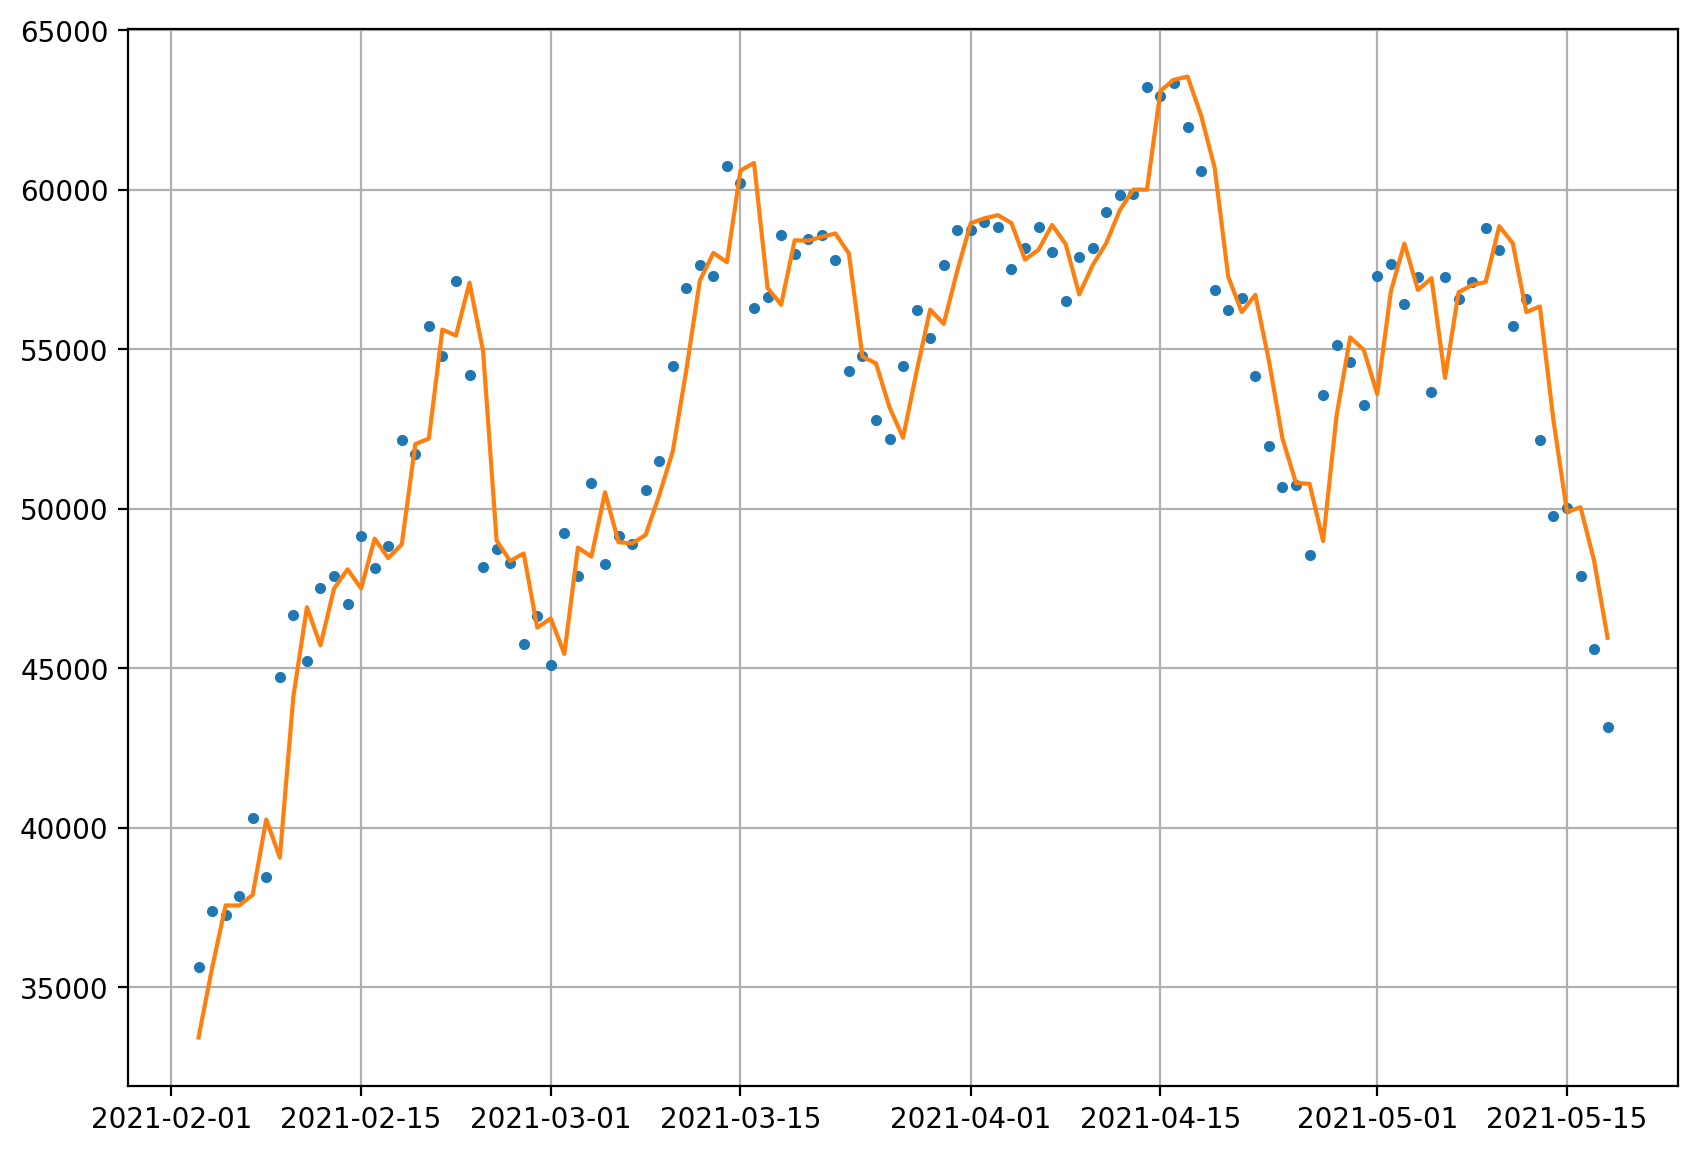

In [65]:
plt.figure(figsize=(10,7), dpi=200)
offset=450
plot_time_series(timesteps=X_test[-len(test_labels):], prices=test_labels[:,0], start=offset)
plot_time_series(timesteps=X_test[-len(test_labels):], prices=model_1_preds, start=offset, format='-')

# Model 2: Dense Model(window_size=30, horizon=1)

## Preparing the data

In [66]:
WINDOW_SIZE = 30
HORIZON = 1

In [67]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [68]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels, test_size=0.2)

In [69]:
train_windows.shape

(2207, 30)

In [70]:
train_labels.shape

(2207, 1)

## Build model

In [71]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name='model_2_dense')

model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model_2.fit(train_windows, 
            train_labels,
            epochs=100,
            validation_data=(test_windows, test_labels),
            callbacks=[checkpoint_callback(model_name=model_2.name)],
            batch_size=128)

Epoch 1/100
18/18 [==============================] - 1s 33ms/step - loss: 1726.3536 - mae: 1726.3536 - val_loss: 4470.0913 - val_mae: 4470.0913
Epoch 2/100
18/18 [==============================] - 0s 25ms/step - loss: 465.0418 - mae: 465.0418 - val_loss: 2406.8755 - val_mae: 2406.8755
Epoch 3/100
18/18 [==============================] - 0s 26ms/step - loss: 305.4243 - mae: 305.4243 - val_loss: 1189.1235 - val_mae: 1189.1235
Epoch 4/100
18/18 [==============================] - 1s 42ms/step - loss: 223.5649 - mae: 223.5649 - val_loss: 1104.2275 - val_mae: 1104.2275
Epoch 5/100
18/18 [==============================] - 0s 27ms/step - loss: 196.8717 - mae: 196.8717 - val_loss: 1081.8357 - val_mae: 1081.8357
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 193.5702 - mae: 193.5702 - val_loss: 1139.7191 - val_mae: 1139.7191
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 205.3722 - mae: 205.3722 - val_loss: 1140.3165 - val_mae: 1140.3165
Epoch 

In [72]:
model_2_best = tf.keras.models.load_model('/content/model_experiments/model_2_dense')

## Evaluate Model

In [73]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 688.3715 - mae: 688.3715


[688.3715209960938, 688.3715209960938]

In [74]:
model_2_results = model_2_best.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 606.5964 - mae: 606.5964


In [75]:
model_2_preds = make_predictions(model_2_best, test_windows)

18/18 [==============================] - 0s 2ms/step


In [76]:
model_2_results = evaluate_preds(tf.squeeze(test_labels), model_2_preds)

In [77]:
model_2_results

{'Mean Absolute Error': 606.5965,
 'Mean Squared Error': 1252804.8,
 'Root Mean Squared Error': 1119.2876,
 'Mean Absolute Percentage Error': 2.7281377,
 'Mean Absolute Scaled Error': 1.0573226}

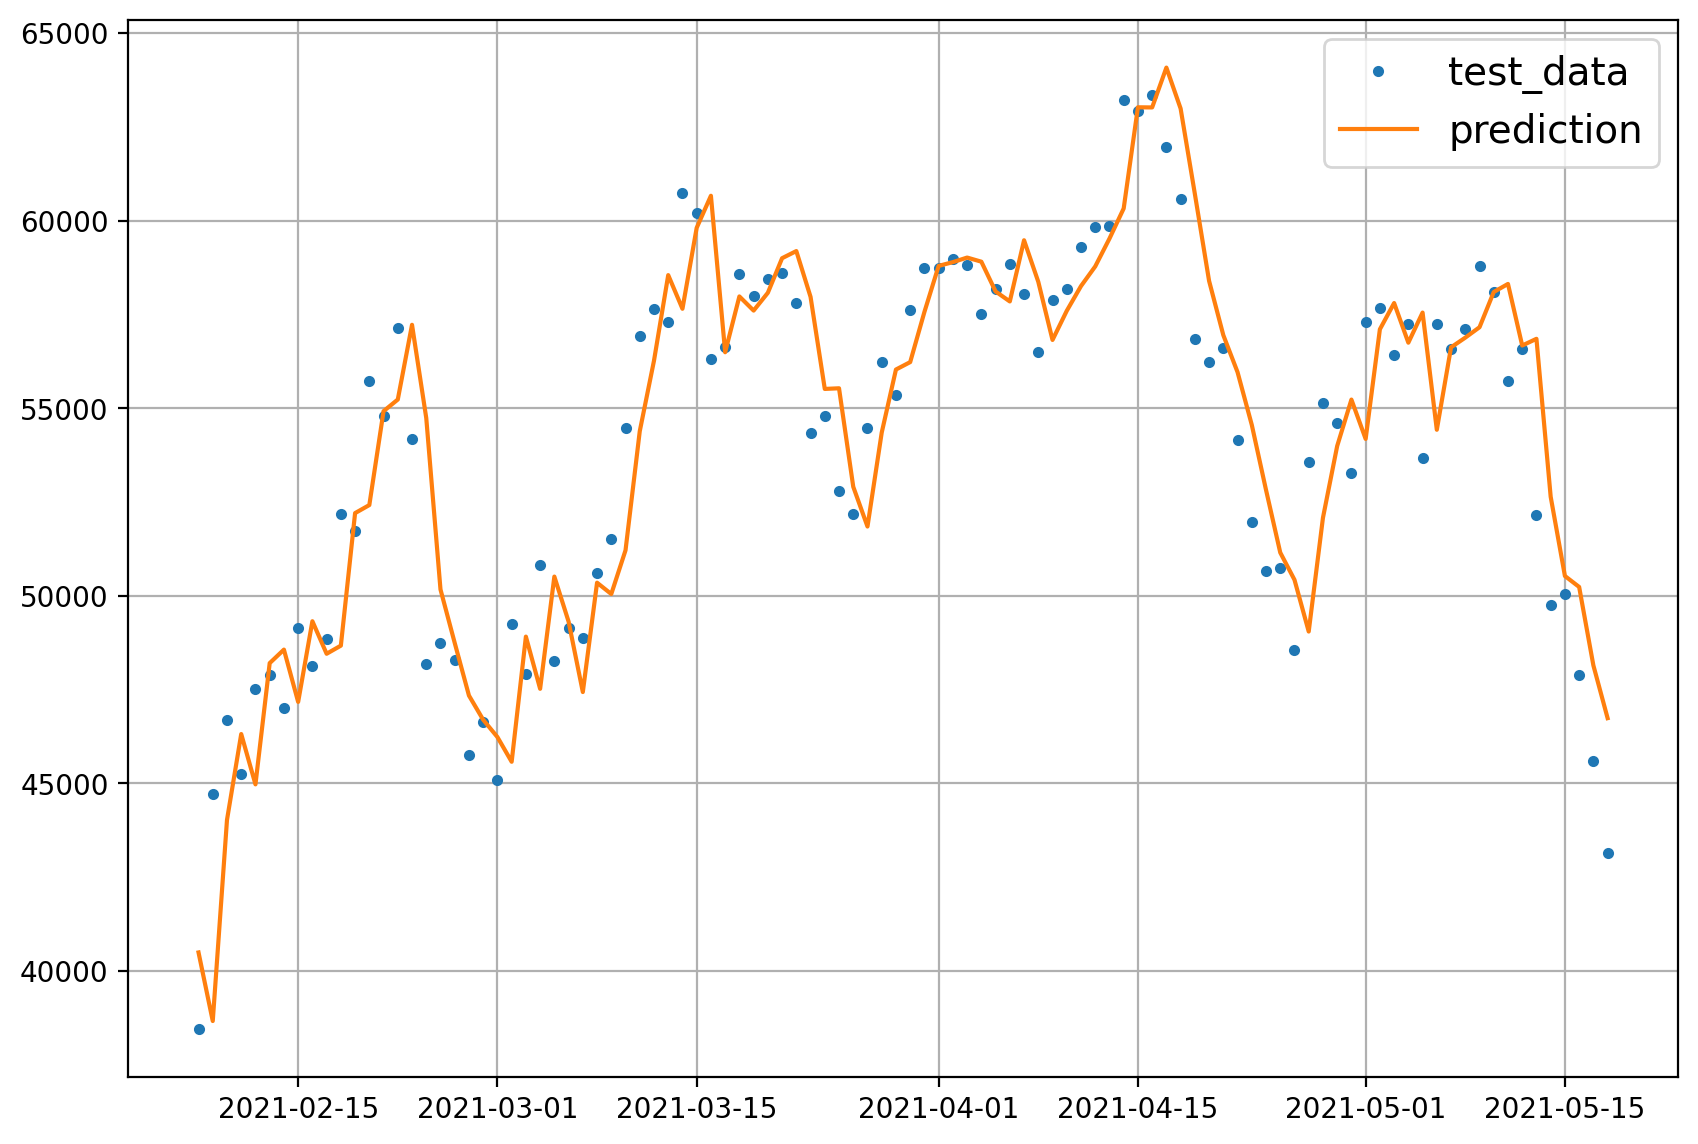

In [78]:
offset=450
plt.figure(figsize=(10,7), dpi=200)
plot_time_series(X_test[-len(test_labels):], test_labels[:,0], start=offset, label='test_data')
plot_time_series(X_test[-len(test_labels):], model_2_preds, start=offset, label='prediction', format='-')

# Model 3: Dense Model(window_size=30, horizon=7)

## Preparing the data

In [79]:
WINDOW_SIZE = 30
HORIZON = 7

In [80]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [81]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels, test_size=0.2)

In [82]:
train_windows.shape

(2202, 30)

In [83]:
train_labels.shape

(2202, 7)

## Building and fitting the model

In [84]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name='model_3_dense')

model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model_3.fit(train_windows, 
            train_labels,
            epochs=100,
            validation_data=(test_windows, test_labels),
            callbacks=[checkpoint_callback(model_name=model_3.name)],
            batch_size=128)

Epoch 1/100
18/18 [==============================] - 1s 31ms/step - loss: 1456.6102 - mae: 1456.6102 - val_loss: 2550.7979 - val_mae: 2550.7979
Epoch 2/100
18/18 [==============================] - 0s 27ms/step - loss: 519.6516 - mae: 519.6516 - val_loss: 2443.5037 - val_mae: 2443.5037
Epoch 3/100
18/18 [==============================] - 0s 27ms/step - loss: 421.4049 - mae: 421.4049 - val_loss: 2160.4683 - val_mae: 2160.4683
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 379.4425 - mae: 379.4425 - val_loss: 1939.1969 - val_mae: 1939.1969
Epoch 5/100
18/18 [==============================] - 0s 26ms/step - loss: 357.3075 - mae: 357.3075 - val_loss: 1865.7491 - val_mae: 1865.7491
Epoch 6/100
18/18 [==============================] - 0s 25ms/step - loss: 337.5604 - mae: 337.5604 - val_loss: 1793.3108 - val_mae: 1793.3108
Epoch 7/100
18/18 [==============================] - 0s 28ms/step - loss: 326.2722 - mae: 326.2722 - val_loss: 1687.2001 - val_mae: 1687.2001
Epoc

In [85]:
model_3_best = tf.keras.models.load_model('/content/model_experiments/model_3_dense')

### Evaluate

In [86]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1300.5878 - mae: 1300.5878


[1300.5877685546875, 1300.5877685546875]

In [87]:
model_3_results = model_3_best.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1239.8458 - mae: 1239.8458


In [88]:
model_3_preds = make_predictions(model_3_best, test_windows)

18/18 [==============================] - 0s 2ms/step


In [89]:
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)

In [90]:
model_3_results

{'Mean Absolute Error': array([  441.13644 ,   602.2065  ,   495.85855 ,   596.70026 ,
          572.46124 ,   631.30334 ,   677.7392  ,   731.4329  ,
          972.4578  ,   897.9331  ,   899.9831  ,   883.941   ,
          546.6124  ,   218.30957 ,   158.74686 ,   157.6324  ,
          196.20389 ,   252.57666 ,   263.45514 ,   287.78705 ,
          324.3042  ,   351.10825 ,   260.25613 ,   106.18046 ,
          137.41512 ,   196.73473 ,   231.94572 ,   295.90527 ,
          378.08658 ,   415.79596 ,   396.2553  ,   361.05338 ,
          366.86203 ,   297.42084 ,   378.3561  ,   265.1093  ,
          245.61893 ,   179.11754 ,   395.38275 ,   113.2004  ,
          132.84668 ,   175.0973  ,   193.0572  ,   148.35645 ,
          112.81885 ,    85.00823 ,   165.85295 ,   191.10847 ,
          228.94295 ,   231.5881  ,   250.8907  ,   178.11691 ,
          200.56787 ,   266.74594 ,   533.4477  ,   432.1727  ,
          431.8361  ,   485.2933  ,   292.60498 ,   169.9082  ,
          227.497

In [91]:
tf.keras.metrics.mean_absolute_error(tf.squeeze(test_labels), model_3_preds).ndim

1

In [92]:
model_2_results['Mean Absolute Error'].ndim

0

In [93]:
def evaluate_preds(y_true, y_preds):
  y_true = tf.cast(y_true, dtype='float32')
  y_preds = tf.cast(y_preds, dtype='float32')
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_preds)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_preds)
  rmse = tf.math.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_preds)
  mase = MASE(y_true, y_preds)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)
  return {'Mean Absolute Error':mae.numpy(),
          'Mean Squared Error':mse.numpy(),
          'Root Mean Squared Error':rmse.numpy(),
          'Mean Absolute Percentage Error': mape.numpy(),
          'Mean Absolute Scaled Error':mase.numpy()}

In [94]:
model_3_results = evaluate_preds(tf.squeeze(test_labels), model_3_preds)

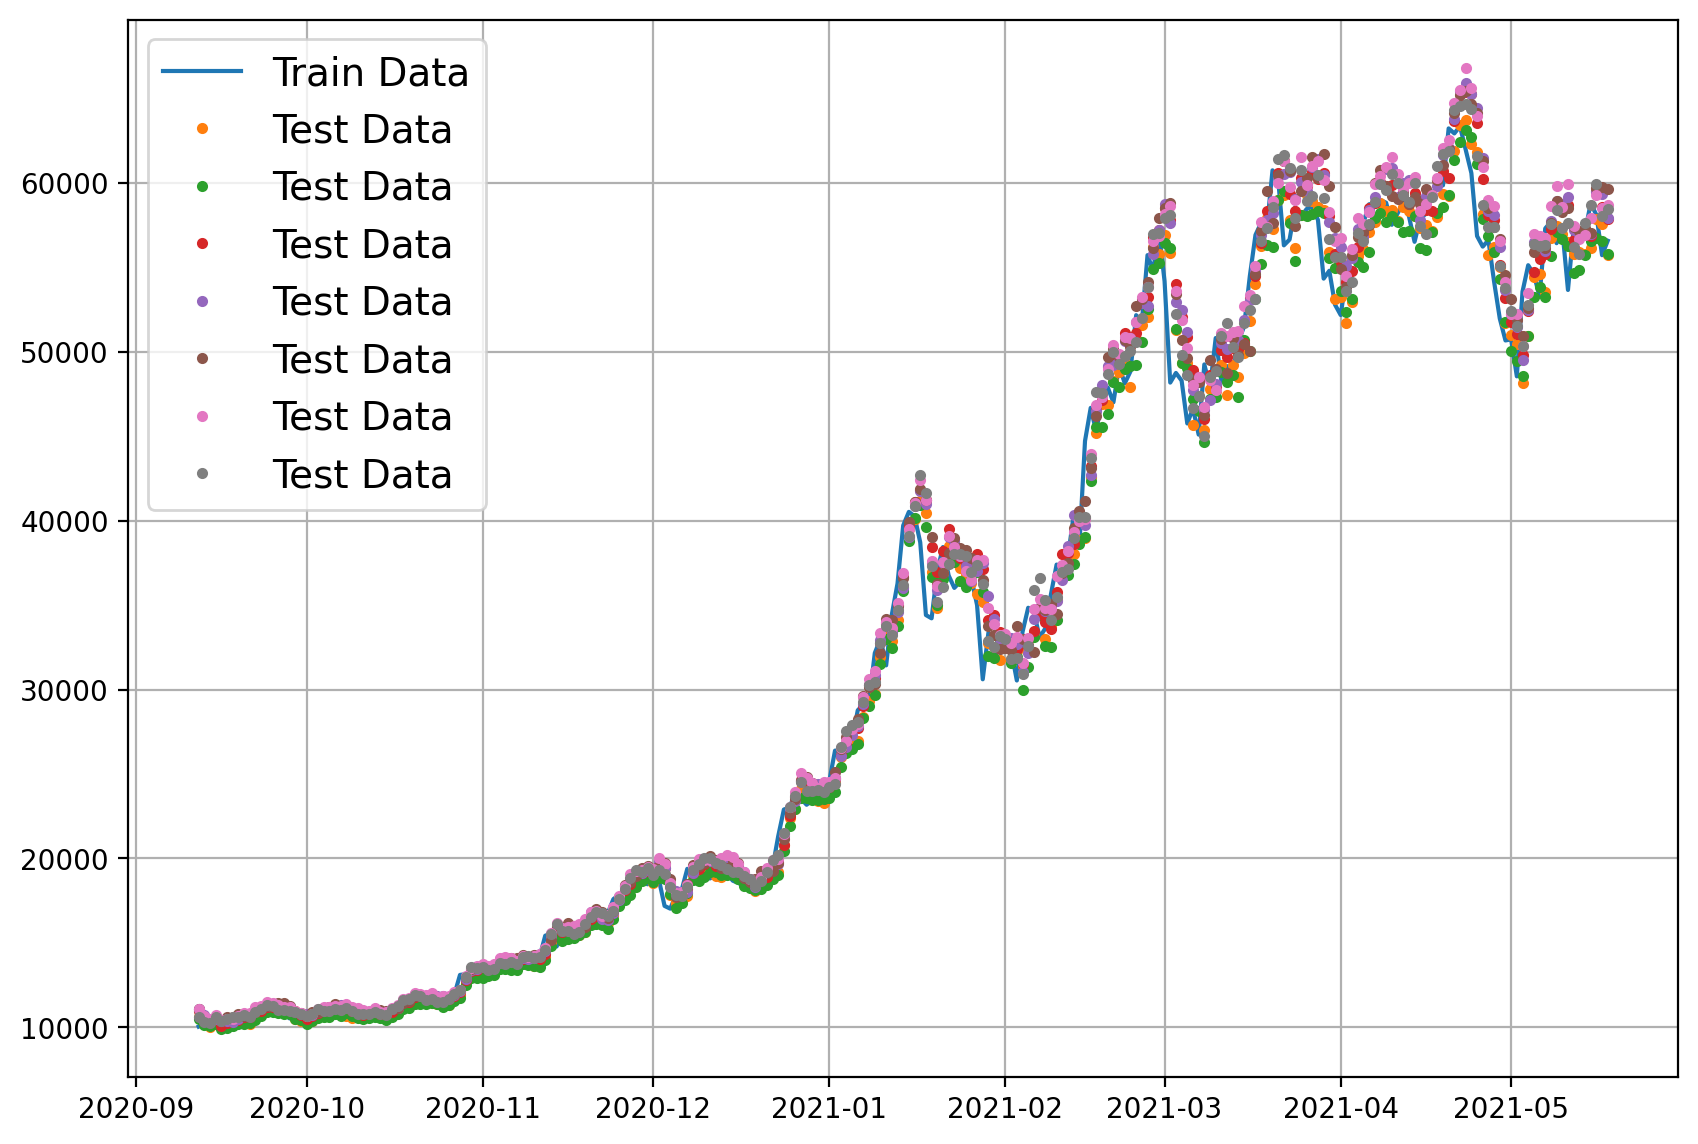

In [95]:
offset = 300
plt.figure(figsize=(10, 7), dpi=200)
plot_time_series(X_test[-len(test_labels):], test_labels[:,0], start=offset, label='Train Data', format='-')
plot_time_series(X_test[-len(test_labels):], model_3_preds, start=offset, label='Test Data')

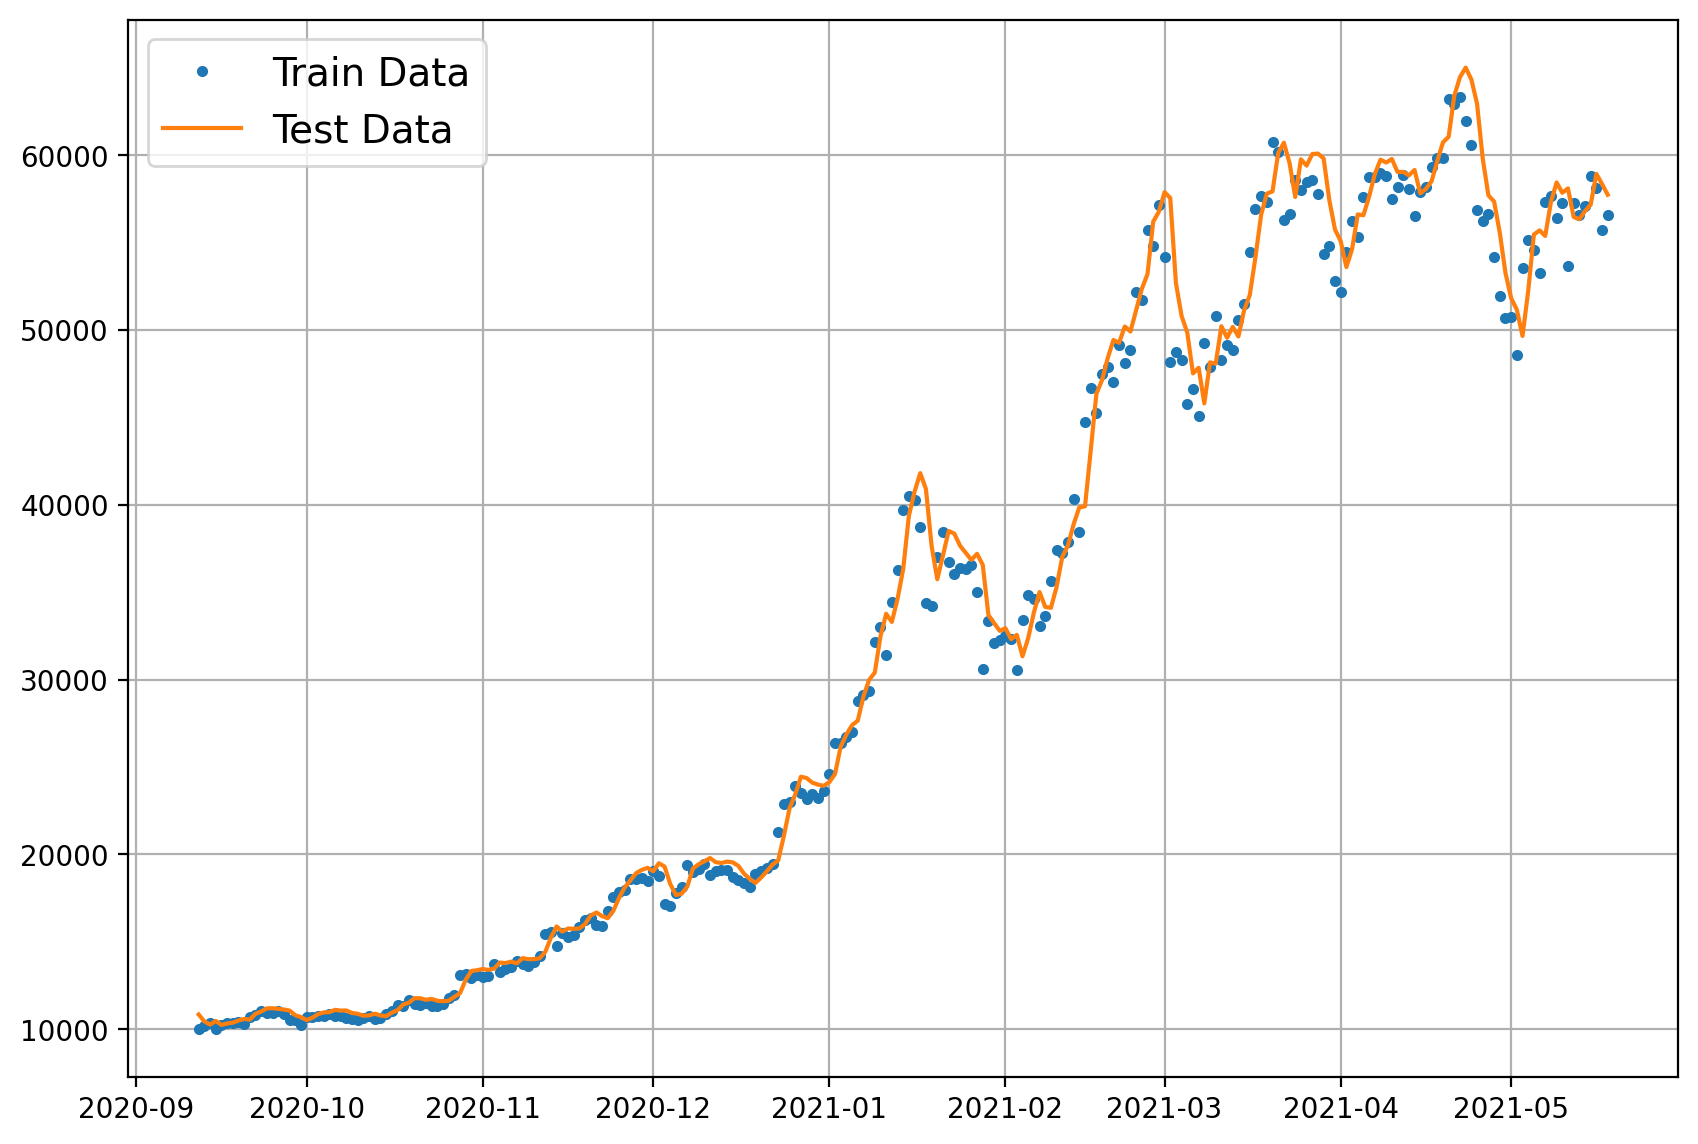

In [96]:
offset = 300
plt.figure(figsize=(10, 7), dpi=200)
plot_time_series(X_test[-len(test_labels):], test_labels[:,0], start=offset, label='Train Data',)
plot_time_series(X_test[-len(test_labels):], tf.reduce_mean(model_3_preds, axis=1), start=offset, label='Test Data', format='-')

# Compare the results of the 4 models

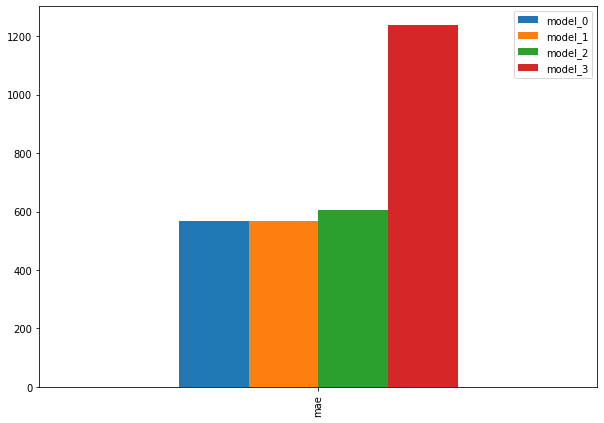

In [97]:
pd.DataFrame({'model_0':model_0_results['Mean Absolute Error'],
              'model_1':model_1_results['Mean Absolute Error'],
              'model_2':model_2_results['Mean Absolute Error'],
              'model_3':model_3_results['Mean Absolute Error']}, index=['mae']).plot(figsize=(10,7), kind='bar')

In [98]:
pd.DataFrame({'model_0':model_0_results['Mean Absolute Error'],
              'model_1':model_1_results['Mean Absolute Error'],
              'model_2':model_2_results['Mean Absolute Error'],
              'model_3':model_3_results['Mean Absolute Error']}, index=['mae'])

,model_0,model_1,model_2,model_3
mae,567.980225,565.993835,606.596497,1239.845947


# Model 4: Conv1D model(window_size=7, horizon=1) 

## Preprocess the data to pass into the Conv1D layer

In [99]:
WINDOW_SIZE = 7
HORIZON = 1

In [100]:
full_windows, full_labels = make_windows(prices, window_size=7, horizon=1)

In [101]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

In [102]:
train_windows.shape, test_windows.shape, train_labels.shape, test_labels.shape

((2225, 7), (555, 7), (2225, 1), (555, 1))

### Creating a lamdba layer to expand the dims

In [103]:
x = tf.constant(train_windows[0])
x.shape

TensorShape([7])

Here the shape is (timesteps, ), but the CONV1D layer required an input shape of (timesteps, 1).
So we use the `lambda` layer to expand the dimension which can then be passed as a layer to the model

In [104]:
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1))

In [105]:
print(f"Shape without expanding:{x.shape}")
print(f"Shape after expanding:{expand_dims_layer(x).shape}")
print(f"Expanded x:{expand_dims_layer(x)}")

Shape without expanding:(7,)
Shape after expanding:(7, 1)
Expanded x:[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


## Building the model

In [106]:
tf.random.set_seed(101)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding='causal', activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name='model_4_conv1D')

model_4.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['MAE'])

model_4.fit(train_windows, 
            train_labels,
                epochs=100,
                validation_data=(test_windows, test_labels),
                batch_size=128,
                callbacks=[checkpoint_callback(model_4.name)])

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 1739.2471 - MAE: 1739.2471  

18/18 [==============================] - 7s 56ms/step - loss: 1708.6890 - MAE: 1708.6890 - val_loss: 1720.4940 - val_MAE: 1720.4940
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 330.4715 - MAE: 330.4715

18/18 [==============================] - 1s 38ms/step - loss: 326.9685 - MAE: 326.9685 - val_loss: 1596.9613 - val_MAE: 1596.9613
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 240.5382 - MAE: 240.5382

18/18 [==============================] - 1s 38ms/step - loss: 240.5382 - MAE: 240.5382 - val_loss: 1109.5260 - val_MAE: 1109.5260
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 206.7706 - MAE: 206.7706

18/18 [==============================] - 1s 38ms/step - loss: 206.7706 - MAE: 206.7706 - val_loss: 1096.9768 - val_MAE: 1096.9768
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 196.7408 - MAE: 196.7408 - val_loss: 1126.6262 - val_MAE: 1126.6262
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 196.2112 - MAE: 196.2112 - val_loss: 1208.3518 - val_MAE: 1208.3518
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 192.1143 - MAE: 192.1143 - val_loss: 1099.0424 - val_MAE: 1099.0424
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 221.2269 - MAE: 221.2269

18/18 [==============================] - 1s 39ms/step - loss: 191.4441 - MAE: 191.4441 - val_loss: 1062.3491 - val_MAE: 1062.3491
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 183.5667 - MAE: 183.5667 - val_loss: 1080.7600 - val_MAE: 1080.7600
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 183.3993 - MAE: 183.3993 - val_loss: 1149.9221 - val_MAE: 1149.9221
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 182.5929 - MAE: 182.5929

18/18 [==============================] - 1s 39ms/step - loss: 182.5929 - MAE: 182.5929 - val_loss: 994.9052 - val_MAE: 994.9052
Epoch 12/100
18/18 [==============================] - ETA: 0s - loss: 178.5700 - MAE: 178.5700

18/18 [==============================] - 1s 38ms/step - loss: 178.5700 - MAE: 178.5700 - val_loss: 987.5660 - val_MAE: 987.5660
Epoch 13/100
16/18 [=========================>....] - ETA: 0s - loss: 172.9854 - MAE: 172.9854

18/18 [==============================] - 1s 38ms/step - loss: 173.3071 - MAE: 173.3071 - val_loss: 974.6473 - val_MAE: 974.6473
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 141.8528 - MAE: 141.8528

18/18 [==============================] - 1s 37ms/step - loss: 170.0659 - MAE: 170.0659 - val_loss: 947.8444 - val_MAE: 947.8444
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 167.3493 - MAE: 167.3493 - val_loss: 1048.9000 - val_MAE: 1048.9000
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 164.7879 - MAE: 164.7879

18/18 [==============================] - 1s 54ms/step - loss: 164.7879 - MAE: 164.7879 - val_loss: 917.7008 - val_MAE: 917.7008
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 160.4878 - MAE: 160.4878 - val_loss: 1004.8177 - val_MAE: 1004.8177
Epoch 18/100
18/18 [==============================] - ETA: 0s - loss: 160.7753 - MAE: 160.7753

18/18 [==============================] - 1s 39ms/step - loss: 160.7753 - MAE: 160.7753 - val_loss: 878.3542 - val_MAE: 878.3542
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 157.0494 - MAE: 157.0494 - val_loss: 965.8245 - val_MAE: 965.8245
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 152.3060 - MAE: 152.3060

18/18 [==============================] - 1s 39ms/step - loss: 153.8546 - MAE: 153.8546 - val_loss: 836.6310 - val_MAE: 836.6310
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 161.6688 - MAE: 161.6688

18/18 [==============================] - 1s 38ms/step - loss: 150.0388 - MAE: 150.0388 - val_loss: 822.4688 - val_MAE: 822.4688
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 149.6940 - MAE: 149.6940

18/18 [==============================] - 1s 38ms/step - loss: 149.6940 - MAE: 149.6940 - val_loss: 804.5930 - val_MAE: 804.5930
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 144.1194 - MAE: 144.1194

18/18 [==============================] - 1s 38ms/step - loss: 144.1194 - MAE: 144.1194 - val_loss: 793.4507 - val_MAE: 793.4507
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 141.6719 - MAE: 141.6719 - val_loss: 805.0682 - val_MAE: 805.0682
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 140.5613 - MAE: 140.5613

18/18 [==============================] - 1s 37ms/step - loss: 140.5613 - MAE: 140.5613 - val_loss: 767.6443 - val_MAE: 767.6443
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 137.9454 - MAE: 137.9454 - val_loss: 882.5817 - val_MAE: 882.5817
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 126.8841 - MAE: 126.8841

18/18 [==============================] - 1s 38ms/step - loss: 137.4669 - MAE: 137.4669 - val_loss: 751.3503 - val_MAE: 751.3503
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 136.2971 - MAE: 136.2971 - val_loss: 774.4430 - val_MAE: 774.4430
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 138.4218 - MAE: 138.4218

18/18 [==============================] - 1s 39ms/step - loss: 138.4218 - MAE: 138.4218 - val_loss: 734.0978 - val_MAE: 734.0978
Epoch 30/100
15/18 [========================>.....] - ETA: 0s - loss: 130.3217 - MAE: 130.3217

18/18 [==============================] - 1s 38ms/step - loss: 130.8421 - MAE: 130.8421 - val_loss: 717.5239 - val_MAE: 717.5239
Epoch 31/100
18/18 [==============================] - ETA: 0s - loss: 130.0340 - MAE: 130.0340

18/18 [==============================] - 1s 38ms/step - loss: 130.0340 - MAE: 130.0340 - val_loss: 710.3069 - val_MAE: 710.3069
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 108.0543 - MAE: 108.0543

18/18 [==============================] - 1s 54ms/step - loss: 128.5542 - MAE: 128.5542 - val_loss: 698.1569 - val_MAE: 698.1569
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 125.8993 - MAE: 125.8993 - val_loss: 723.2739 - val_MAE: 723.2739
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 124.3343 - MAE: 124.3343 - val_loss: 706.2159 - val_MAE: 706.2159
Epoch 35/100
17/18 [===========================>..] - ETA: 0s - loss: 128.4506 - MAE: 128.4506

18/18 [==============================] - 1s 42ms/step - loss: 126.9650 - MAE: 126.9650 - val_loss: 675.8469 - val_MAE: 675.8469
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 124.8286 - MAE: 124.8286 - val_loss: 705.1735 - val_MAE: 705.1735
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 125.6355 - MAE: 125.6355

18/18 [==============================] - 1s 38ms/step - loss: 125.6355 - MAE: 125.6355 - val_loss: 664.3470 - val_MAE: 664.3470
Epoch 38/100
17/18 [===========================>..] - ETA: 0s - loss: 123.0588 - MAE: 123.0588

18/18 [==============================] - 1s 39ms/step - loss: 122.7713 - MAE: 122.7713 - val_loss: 659.4101 - val_MAE: 659.4101
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 124.0750 - MAE: 124.0750 - val_loss: 686.6001 - val_MAE: 686.6001
Epoch 40/100
16/18 [=========================>....] - ETA: 0s - loss: 122.4653 - MAE: 122.4653

18/18 [==============================] - 1s 40ms/step - loss: 122.2201 - MAE: 122.2201 - val_loss: 658.4680 - val_MAE: 658.4680
Epoch 41/100
17/18 [===========================>..] - ETA: 0s - loss: 124.9163 - MAE: 124.9163

18/18 [==============================] - 1s 39ms/step - loss: 124.5905 - MAE: 124.5905 - val_loss: 648.9866 - val_MAE: 648.9866
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 122.6340 - MAE: 122.6340 - val_loss: 665.4139 - val_MAE: 665.4139
Epoch 43/100
18/18 [==============================] - ETA: 0s - loss: 118.1913 - MAE: 118.1913

18/18 [==============================] - 1s 39ms/step - loss: 118.1913 - MAE: 118.1913 - val_loss: 642.3508 - val_MAE: 642.3508
Epoch 44/100
17/18 [===========================>..] - ETA: 0s - loss: 120.2886 - MAE: 120.2886

18/18 [==============================] - 1s 39ms/step - loss: 120.7335 - MAE: 120.7335 - val_loss: 635.7437 - val_MAE: 635.7437
Epoch 45/100
18/18 [==============================] - ETA: 0s - loss: 118.8283 - MAE: 118.8283

18/18 [==============================] - 1s 40ms/step - loss: 118.8283 - MAE: 118.8283 - val_loss: 635.3463 - val_MAE: 635.3463
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 119.9618 - MAE: 119.9618 - val_loss: 662.7428 - val_MAE: 662.7428
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 117.9240 - MAE: 117.9240 - val_loss: 645.0230 - val_MAE: 645.0230
Epoch 48/100
17/18 [===========================>..] - ETA: 0s - loss: 113.2247 - MAE: 113.2247

18/18 [==============================] - 1s 38ms/step - loss: 115.5491 - MAE: 115.5491 - val_loss: 624.1108 - val_MAE: 624.1108
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 116.0849 - MAE: 116.0849 - val_loss: 645.9150 - val_MAE: 645.9150
Epoch 50/100
16/18 [=========================>....] - ETA: 0s - loss: 115.7540 - MAE: 115.7540

18/18 [==============================] - 1s 38ms/step - loss: 120.3479 - MAE: 120.3479 - val_loss: 619.3590 - val_MAE: 619.3590
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 123.2280 - MAE: 123.2280 - val_loss: 624.2848 - val_MAE: 624.2848
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 144.5428 - MAE: 144.5428

18/18 [==============================] - 1s 37ms/step - loss: 117.2444 - MAE: 117.2444 - val_loss: 613.5749 - val_MAE: 613.5749
Epoch 53/100
18/18 [==============================] - ETA: 0s - loss: 114.0771 - MAE: 114.0771

18/18 [==============================] - 1s 54ms/step - loss: 114.0771 - MAE: 114.0771 - val_loss: 613.3329 - val_MAE: 613.3329
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 122.5157 - MAE: 122.5157 - val_loss: 678.3033 - val_MAE: 678.3033
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 183.1458 - MAE: 183.1458

18/18 [==============================] - 1s 38ms/step - loss: 116.2947 - MAE: 116.2947 - val_loss: 612.1498 - val_MAE: 612.1498
Epoch 56/100
18/18 [==============================] - ETA: 0s - loss: 115.8038 - MAE: 115.8038

18/18 [==============================] - 1s 39ms/step - loss: 115.8038 - MAE: 115.8038 - val_loss: 605.9921 - val_MAE: 605.9921
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7863 - MAE: 112.7863 - val_loss: 617.0770 - val_MAE: 617.0770
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 115.3464 - MAE: 115.3464 - val_loss: 652.7175 - val_MAE: 652.7175
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 117.3002 - MAE: 117.3002 - val_loss: 646.4626 - val_MAE: 646.4626
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 119.3579 - MAE: 119.3579 - val_loss: 649.1938 - val_MAE: 649.1938
Epoch 61/100
18/18 [==============================] - ETA: 0s - loss: 120.5589 - MAE: 120.5589

18/18 [==============================] - 1s 39ms/step - loss: 120.5589 - MAE: 120.5589 - val_loss: 599.6190 - val_MAE: 599.6190
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 118.3596 - MAE: 118.3596 - val_loss: 663.2856 - val_MAE: 663.2856
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 124.3936 - MAE: 124.3936 - val_loss: 608.1258 - val_MAE: 608.1258
Epoch 64/100
18/18 [==============================] - ETA: 0s - loss: 117.8929 - MAE: 117.8929

18/18 [==============================] - 1s 39ms/step - loss: 117.8929 - MAE: 117.8929 - val_loss: 595.4376 - val_MAE: 595.4376
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7172 - MAE: 112.7172 - val_loss: 597.8079 - val_MAE: 597.8079
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4303 - MAE: 113.4303 - val_loss: 628.8995 - val_MAE: 628.8995
Epoch 67/100
17/18 [===========================>..] - ETA: 0s - loss: 116.0491 - MAE: 116.0491

18/18 [==============================] - 1s 40ms/step - loss: 115.4995 - MAE: 115.4995 - val_loss: 592.2108 - val_MAE: 592.2108
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2136 - MAE: 111.2136 - val_loss: 596.0402 - val_MAE: 596.0402
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 111.6267 - MAE: 111.6267 - val_loss: 597.2686 - val_MAE: 597.2686
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 112.4477 - MAE: 112.4477 - val_loss: 601.0143 - val_MAE: 601.0143
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2554 - MAE: 110.2554 - val_loss: 603.6194 - val_MAE: 603.6194
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7953 - MAE: 112.7953 - val_loss: 623.6758 - val_MAE: 623.6758
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9825 - MAE: 113.9825 - val_loss: 610.1147 - val_MAE: 610.1147
Epoch 74/100
18/18 [============

18/18 [==============================] - 1s 38ms/step - loss: 111.8113 - MAE: 111.8113 - val_loss: 585.9971 - val_MAE: 585.9971
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 110.1869 - MAE: 110.1869 - val_loss: 592.0170 - val_MAE: 592.0170
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8239 - MAE: 110.8239 - val_loss: 624.0912 - val_MAE: 624.0912
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 114.2073 - MAE: 114.2073 - val_loss: 727.5234 - val_MAE: 727.5234
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2485 - MAE: 112.2485 - val_loss: 630.7972 - val_MAE: 630.7972
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2612 - MAE: 112.2612 - val_loss: 662.8716 - val_MAE: 662.8716
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4601 - MAE: 113.4601 - val_loss: 597.7686 - val_MAE: 597.7686
Epoch 81/100
18/18 [============

18/18 [==============================] - 1s 39ms/step - loss: 115.8093 - MAE: 115.8093 - val_loss: 580.4368 - val_MAE: 580.4368
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1751 - MAE: 111.1751 - val_loss: 611.2086 - val_MAE: 611.2086
Epoch 85/100
18/18 [==============================] - ETA: 0s - loss: 115.0796 - MAE: 115.0796

18/18 [==============================] - 1s 38ms/step - loss: 115.0796 - MAE: 115.0796 - val_loss: 578.8142 - val_MAE: 578.8142
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3473 - MAE: 109.3473 - val_loss: 621.3536 - val_MAE: 621.3536
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 114.1314 - MAE: 114.1314 - val_loss: 586.9564 - val_MAE: 586.9564
Epoch 88/100
 1/18 [>.............................] - ETA: 0s - loss: 111.1035 - MAE: 111.1035

18/18 [==============================] - 1s 37ms/step - loss: 109.1468 - MAE: 109.1468 - val_loss: 575.9332 - val_MAE: 575.9332
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3768 - MAE: 109.3768 - val_loss: 577.6780 - val_MAE: 577.6780
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4817 - MAE: 110.4817 - val_loss: 600.1457 - val_MAE: 600.1457
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6809 - MAE: 109.6809 - val_loss: 603.3419 - val_MAE: 603.3419
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6826 - MAE: 108.6826 - val_loss: 579.8113 - val_MAE: 579.8113
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 108.2901 - MAE: 108.2901 - val_loss: 583.3633 - val_MAE: 583.3633
Epoch 94/100
18/18 [==============================] - ETA: 0s - loss: 107.9108 - MAE: 107.9108

18/18 [==============================] - 1s 40ms/step - loss: 107.9108 - MAE: 107.9108 - val_loss: 573.9127 - val_MAE: 573.9127
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 111.6327 - MAE: 111.6327 - val_loss: 573.9812 - val_MAE: 573.9812
Epoch 96/100
16/18 [=========================>....] - ETA: 0s - loss: 109.0763 - MAE: 109.0763

18/18 [==============================] - 1s 38ms/step - loss: 108.7288 - MAE: 108.7288 - val_loss: 573.5660 - val_MAE: 573.5660
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 107.7736 - MAE: 107.7736 - val_loss: 614.7205 - val_MAE: 614.7205
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8564 - MAE: 109.8564 - val_loss: 579.6276 - val_MAE: 579.6276
Epoch 99/100
18/18 [==============================] - 0s 4ms/step - loss: 116.2024 - MAE: 116.2024 - val_loss: 624.4224 - val_MAE: 624.4224
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 116.7052 - MAE: 116.7052 - val_loss: 631.6663 - val_MAE: 631.6663


### Evaluation

In [107]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 631.6663 - MAE: 631.6663


[631.666259765625, 631.666259765625]

In [108]:
model_4_best = tf.keras.models.load_model('/content/model_experiments/model_4_conv1D')

In [109]:
model_4_best.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 573.5660 - MAE: 573.5660


[573.5659790039062, 573.5659790039062]

In [110]:
model_4_preds = model_4_best.predict(test_windows)

18/18 [==============================] - 0s 2ms/step


In [111]:
model_4_results = evaluate_preds(tf.squeeze(test_labels), model_4_preds)

In [112]:
model_4_results

{'Mean Absolute Error': 17158.174,
 'Mean Squared Error': 615099650.0,
 'Root Mean Squared Error': 23726.348,
 'Mean Absolute Percentage Error': 113.34248,
 'Mean Absolute Scaled Error': 30.11484}

# Model 5: RNN(LSTM) (window_size=7, horizon=1)

## Building the model

In [113]:
tf.random.set_seed(101)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.LSTM(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name='model_5_lstm')

model_5.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[checkpoint_callback(model_5.name)])

Epoch 1/100
18/18 [==============================] - 3s 116ms/step - loss: 2126.4409 - mae: 2126.4409 - val_loss: 8983.4102 - val_mae: 8983.4102
Epoch 2/100
18/18 [==============================] - 2s 103ms/step - loss: 711.6339 - mae: 711.6339 - val_loss: 1556.4133 - val_mae: 1556.4133
Epoch 3/100
18/18 [==============================] - 2s 117ms/step - loss: 234.8247 - mae: 234.8247 - val_loss: 1399.5168 - val_mae: 1399.5168
Epoch 4/100
18/18 [==============================] - 2s 104ms/step - loss: 198.2457 - mae: 198.2457 - val_loss: 1049.0817 - val_mae: 1049.0817
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 188.2350 - mae: 188.2350 - val_loss: 1057.9912 - val_mae: 1057.9912
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 186.7182 - mae: 186.7182 - val_loss: 1093.4250 - val_mae: 1093.4250
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 184.6615 - mae: 184.6615 - val_loss: 1049.8364 - val_mae: 1049.8364
Epo

# Making our univariate time series data into multivariate time series data

In [114]:
df.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [115]:
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

In [116]:
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [117]:
block_reward_2_days = (block_reward_3_datetime - df.index[0]).days
block_reward_3_days = (block_reward_4_datetime - df.index[0]).days

In [118]:
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [119]:
df_block = df.copy()
df_block['Block'] = None

In [120]:
df_block.head()

,Price,Block
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [121]:
df_block.iloc[:block_reward_2_days, -1] = block_reward_2

In [122]:
df_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3

In [123]:
df_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [124]:
df_block.head()

,Price,Block
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [125]:
df_block.tail()

,Price,Block
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


In [126]:
from sklearn.preprocessing import  minmax_scale
df_block_scaled = pd.DataFrame(minmax_scale(df_block[['Price', 'Block']]),columns=df_block.columns, index=df_block.index)

<Figure size 1200x800 with 0 Axes>

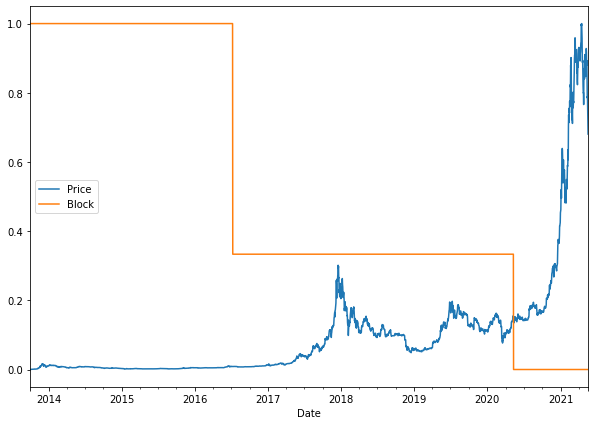

In [127]:
# plt.rcParams["figure.dpi"] = 200
plt.figure(dpi=200)
df_block_scaled.plot(figsize=(10,7))

# Split the multivariate data into windows

In [128]:
WINDOW_SIZE = 7
HORIZON = 1

In [129]:
df_block_windowed = df_block.copy()

In [130]:
for i in range(WINDOW_SIZE):
  df_block_windowed[f"Prices {i+1}"] = df_block_windowed['Price'].shift(periods=i+1)

In [131]:
df_block_windowed.head(15)

,Price,Block,Prices 1,Prices 2,Prices 3,Prices 4,Prices 5,Prices 6,Prices 7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [132]:
windows = df_block_windowed.dropna().drop('Price', axis=1).astype('float32')
labels = df_block_windowed.dropna()['Price'].astype('float32')

In [133]:
windows.head()

,Block,Prices 1,Prices 2,Prices 3,Prices 4,Prices 5,Prices 6,Prices 7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [134]:
labels.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [135]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows, labels)

In [136]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2225, 555, 2225, 555)

# Model 6 (Multivariate Data)

## Building the model

In [137]:
tf.random.set_seed(101)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name='model_6_dense_multivariate')

model_6.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_6.fit(train_windows, 
            train_labels,
            epochs=100,
            validation_data=(test_windows, test_labels),
            callbacks=[checkpoint_callback(model_name=model_6.name)])

Epoch 1/100
70/70 [==============================] - 1s 11ms/step - loss: 338.7386 - mae: 338.7386 - val_loss: 838.5486 - val_mae: 838.5486
Epoch 2/100
70/70 [==============================] - 1s 8ms/step - loss: 145.3102 - mae: 145.3102 - val_loss: 821.3833 - val_mae: 821.3833
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: 148.1101 - mae: 148.1101 - val_loss: 779.0916 - val_mae: 779.0916
Epoch 4/100
70/70 [==============================] - 1s 8ms/step - loss: 134.4282 - mae: 134.4282 - val_loss: 718.9933 - val_mae: 718.9933
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 134.9989 - mae: 134.9989 - val_loss: 719.8850 - val_mae: 719.8850
Epoch 6/100
70/70 [==============================] - 1s 15ms/step - loss: 131.4292 - mae: 131.4292 - val_loss: 679.2654 - val_mae: 679.2654
Epoch 7/100
70/70 [==============================] - 1s 9ms/step - loss: 124.2946 - mae: 124.2946 - val_loss: 671.4719 - val_mae: 671.4719
Epoch 8/100
70/70 [======

### Evaluation

In [138]:
model_6.evaluate(test_windows)

18/18 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - mae: 0.0000e+00


[0.0, 0.0]

In [139]:
model_6_best = tf.keras.models.load_model('/content/model_experiments/model_6_dense_multivariate')

In [140]:
model_6_best.evaluate(test_windows)

18/18 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - mae: 0.0000e+00


[0.0, 0.0]

In [141]:
model_6_preds = make_predictions(model_6_best, test_windows)

18/18 [==============================] - 0s 1ms/step


In [142]:
model_6_results = evaluate_preds(tf.squeeze(test_labels), model_6_preds)

In [143]:
model_6_results

{'Mean Absolute Error': 571.43994,
 'Mean Squared Error': 1176439.2,
 'Root Mean Squared Error': 1084.6378,
 'Mean Absolute Percentage Error': 2.5651894,
 'Mean Absolute Scaled Error': 1.0029519}

In [144]:
model_1_results

{'Mean Absolute Error': 565.99384,
 'Mean Squared Error': 1151585.8,
 'Root Mean Squared Error': 1073.1196,
 'Mean Absolute Percentage Error': 2.5332713,
 'Mean Absolute Scaled Error': 0.9933932}

# Model 7: Creating a N-beats algorithm

## Creating a N-beats Block

In [145]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size : int,
               theta_size : int,
               horizon : int,
               n_neurons : int,
               n_layers : int, 
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden_layer = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear')

  def call(self, inputs):
    x = inputs
    for layer in self.hidden_layer:
      x = layer(x)
    theta = self.theta_layer(x)
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

### Testing the n-beats block using dummy inputs

In [146]:
dummy_nb = NBeatsBlock(input_size=WINDOW_SIZE,
                       theta_size=WINDOW_SIZE + HORIZON,
                       horizon=HORIZON,
                       n_neurons=128,
                       n_layers=4)

dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE), axis=0)

In [147]:
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>

In [148]:
backcast, forecast = dummy_nb(dummy_inputs)

In [149]:
print(f"Backcast:{backcast.numpy()}")
print(f"Forecast:{forecast.numpy()}")

Backcast:[[ 0.57235456  1.1569747   0.00239234 -0.36954844  0.7846535  -0.02261972
   0.35492313]]
Forecast:[[-0.8324307]]


## Turning our data into performant `tf.data`.

In [150]:
WINDOW_SIZE = 7
HORIZON = 1

In [151]:
df.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [152]:
df_copy = df.copy()
for i in range(WINDOW_SIZE):
  df_copy[f"i+{i+1}"] = df_copy['Price'].shift(i+1)

In [153]:
df_copy.head()

,Price,i+1,i+2,i+3,i+4,i+5,i+6,i+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [154]:
X = df_copy.dropna().drop('Price', axis=1)
y = df_copy.dropna()['Price']
X.head()

,i+1,i+2,i+3,i+4,i+5,i+6,i+7
Date,,,,,,,
2013-10-08,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [155]:
y.head()

Date
2013-10-08    123.03300
2013-10-09    124.04900
2013-10-10    125.96116
2013-10-11    125.27966
2013-10-12    125.92750
Name: Price, dtype: float64

In [156]:
train_size = int(0.8 * len(X))

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [157]:
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [158]:
X_train_d = tf.data.Dataset.from_tensor_slices(X_train)
y_train_d = tf.data.Dataset.from_tensor_slices(y_train)

X_test_d = tf.data.Dataset.from_tensor_slices(X_test)
y_test_d = tf.data.Dataset.from_tensor_slices(y_test)

In [159]:
train_dataset = tf.data.Dataset.zip((X_train_d, y_train_d))
test_dataset  = tf.data.Dataset.zip((X_test_d, y_test_d))

train_dataset = train_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)

In [160]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [161]:
test_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

## Hyperparameters for N-Beats algoritm

In [162]:
WINDOW_SIZE = 7
HORIZON = 1

In [163]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETHA_SIZE = WINDOW_SIZE + HORIZON

In [164]:
INPUT_SIZE, THETHA_SIZE

(7, 8)

## Building a doubly residual connections for our model

### Demonstrating the `tf.keras.layers.add` and `tf.keras.layers.subtract` layers in tensorflow

In [165]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracted = tf.keras.layers.subtract([tensor_1, tensor_2])

added = tf.keras.layers.add([tensor_1, tensor_2])

In [166]:
print(f"Tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Tensors after subtraction:\n{subtracted.numpy()}")
print(f"Tensors after addition:\n{added.numpy()}")

Tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Tensors after subtraction:
[10 10 10 10 10 10 10 10 10 10]
Tensors after addition:
[10 12 14 16 18 20 22 24 26 28]


## Building compiling and fitting the N-Beats model

In [167]:
tf.random.set_seed(101)

n_beats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                            theta_size=THETHA_SIZE,
                            horizon=HORIZON,
                            n_neurons=N_NEURONS,
                            n_layers=N_LAYERS, name="initial_block_layer")

stack_input = tf.keras.layers.Input(shape=(INPUT_SIZE), name='stack_input')

backcast, forecast = n_beats_block_layer(stack_input)
residuals = tf.keras.layers.subtract([stack_input,backcast], name='residual_00')

for i, _ in enumerate(range(N_STACKS - 1)):
  backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                   theta_size=THETHA_SIZE,
                                   horizon=HORIZON,
                                   n_neurons=N_NEURONS,
                                   n_layers=N_LAYERS,
                                   name=f"NBeatsBlock_{i}")(residuals)
  residuals = tf.keras.layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = tf.keras.layers.add([forecast, block_forecast], name=f"add_{i}")

model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name='model_7')

model_7.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

history_7 = model_7.fit(train_dataset,
                        epochs=N_EPOCHS,
                        validation_data=test_dataset,
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                    patience=200,
                                                                    restore_best_weights=True),
                                   tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                        patience=100,
                                                                        varbose=1)])
  

Epoch 1/5000
3/3 [==============================] - 10s 886ms/step - loss: 35435.2031 - mae: 35435.2031 - mse: 3867393280.0000 - val_loss: 5868.3418 - val_mae: 5868.3418 - val_mse: 65580900.0000 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 0s 85ms/step - loss: 11722.9150 - mae: 11722.9150 - mse: 491706400.0000 - val_loss: 8471.6309 - val_mae: 8471.6309 - val_mse: 131934072.0000 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 0s 139ms/step - loss: 989.9618 - mae: 989.9618 - mse: 6904025.0000 - val_loss: 4660.8809 - val_mae: 4660.8809 - val_mse: 40687976.0000 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 0s 124ms/step - loss: 214.1248 - mae: 214.1248 - mse: 147826.0781 - val_loss: 2647.6626 - val_mae: 2647.6626 - val_mse: 14376012.0000 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 0s 58ms/step - loss: 522.2645 - mae: 522.2645 - mse: 835977.0625 - val_loss: 5989.9468 - val_mae: 5989.9468 - val_mse: 65968996.0000 - 

### Evaluation

In [168]:
model_7_preds = model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 26ms/step - loss: 581.6331 - mae: 581.6331 - mse: 1203910.5000


In [169]:
model_7_preds = make_predictions(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8931.875, 8828.647, 9054.626, 8833.61 , 8756.614, 8801.115,
       8693.152, 8532.222, 8539.307, 8543.034], dtype=float32)>

In [170]:
y_test

Date
2019-11-10     8798.042055
2019-11-11     9081.186878
2019-11-12     8711.534339
2019-11-13     8760.892718
2019-11-14     8749.520591
                  ...     
2021-05-14    49764.132082
2021-05-15    50032.693137
2021-05-16    47885.625255
2021-05-17    45604.615754
2021-05-18    43144.471291
Name: Price, Length: 556, dtype: float64

In [171]:
model_7_results = evaluate_preds(y_test, model_7_preds)

In [172]:
model_7_results

{'Mean Absolute Error': 581.6331,
 'Mean Squared Error': 1203910.5,
 'Root Mean Squared Error': 1097.2285,
 'Mean Absolute Percentage Error': 2.685561,
 'Mean Absolute Scaled Error': 1.0217683}

In [173]:
model_0_results

{'Mean Absolute Error': 567.9802,
 'Mean Squared Error': 1147547.0,
 'Root Mean Squared Error': 1071.2362,
 'Mean Absolute Percentage Error': 2.516525,
 'Mean Absolute Scaled Error': 0.99957}

In [174]:
model_1_results

{'Mean Absolute Error': 565.99384,
 'Mean Squared Error': 1151585.8,
 'Root Mean Squared Error': 1073.1196,
 'Mean Absolute Percentage Error': 2.5332713,
 'Mean Absolute Scaled Error': 0.9933932}

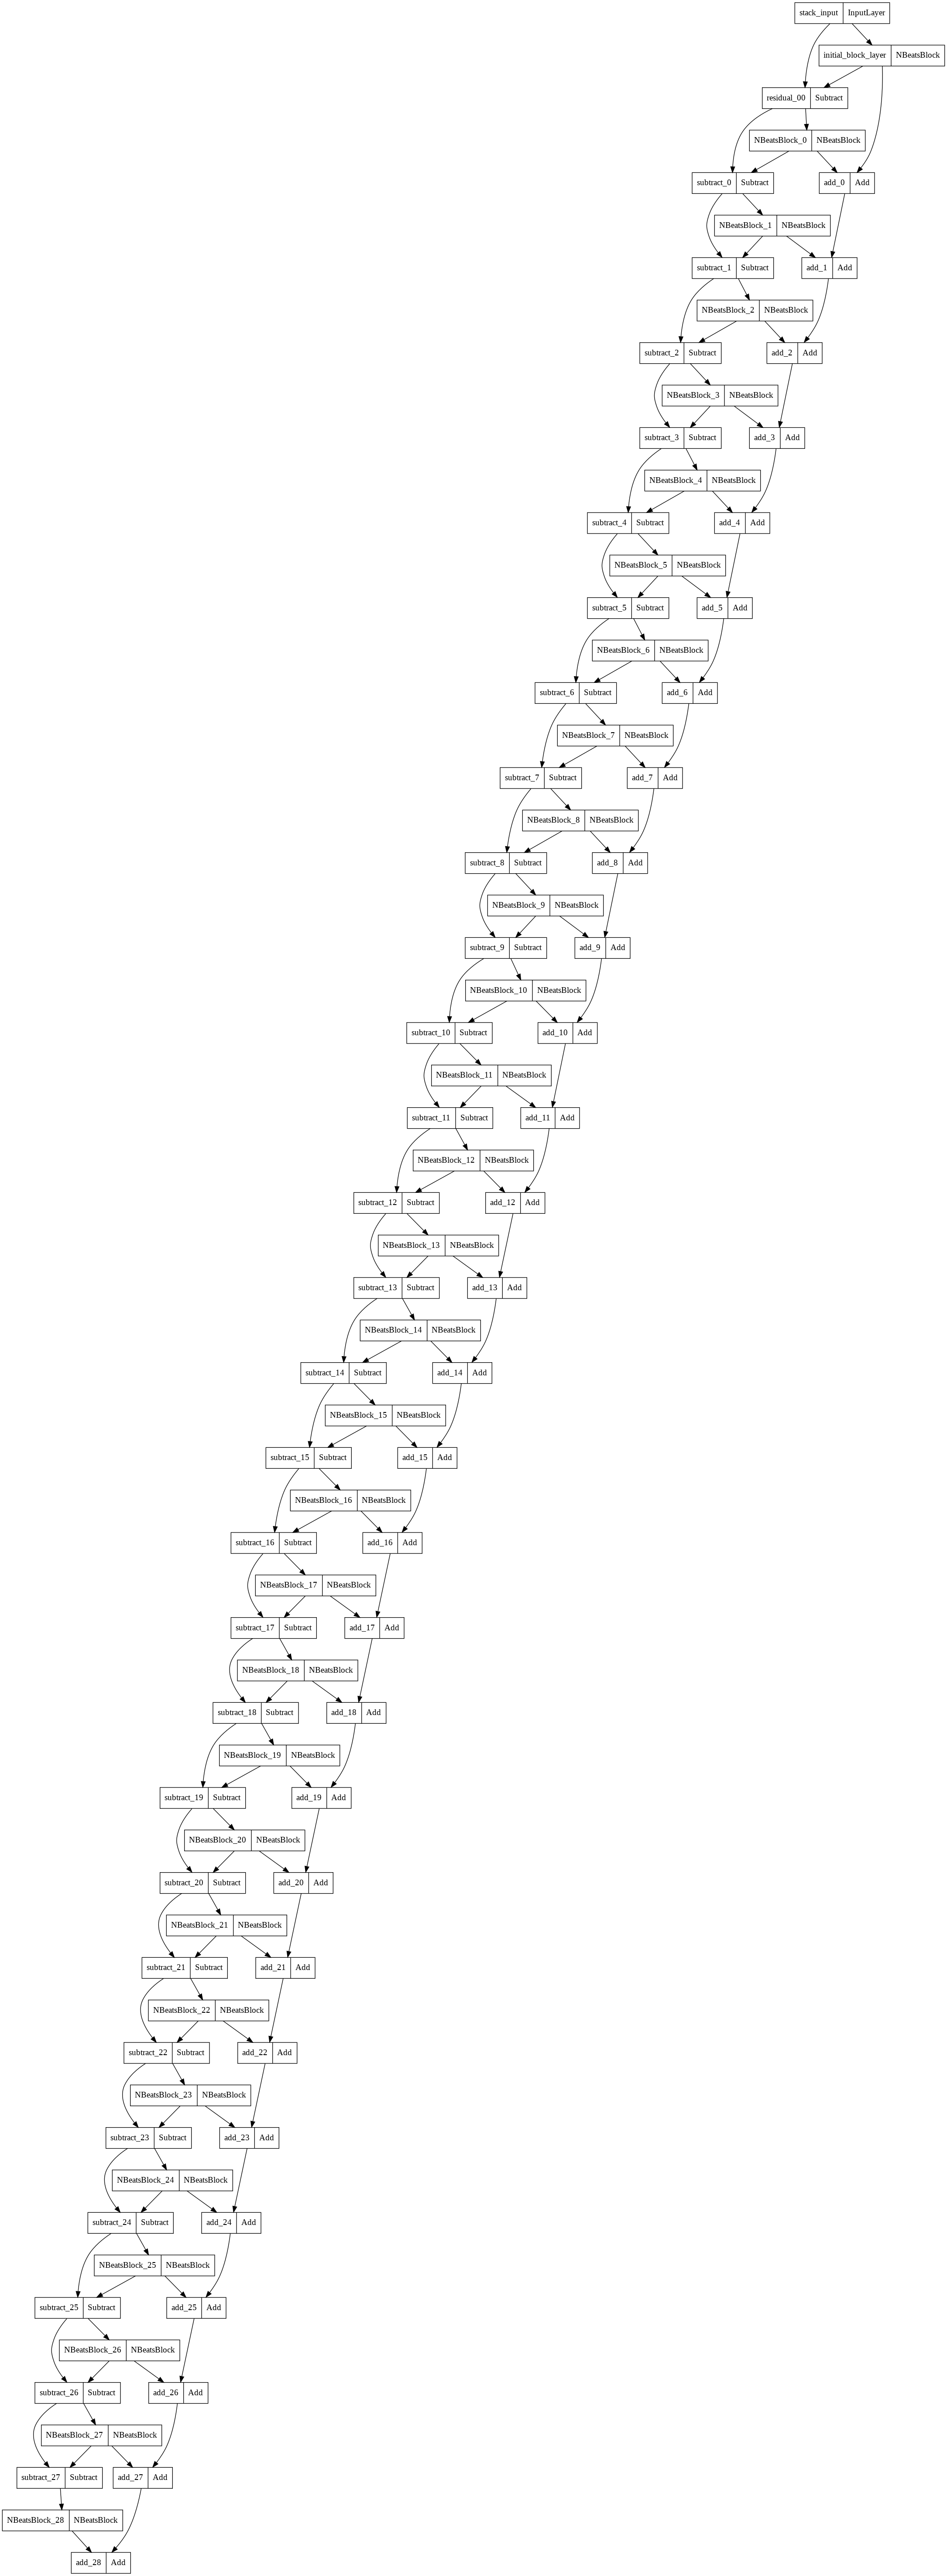

In [175]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

# Model 8 : Ensemble Model

##Building and fitting the Ensemble Model

In [176]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        validation_data=test_dataset,
                        num_iters=10,
                        num_epochs=1000,
                        loss_fns=['mae', 'mse', 'mape']):
  ensemble_models = []

  for i in range(num_iters):
    for fn in loss_fns:
      print(f"Optimizing model by reducing: {fn} for {num_epochs} epochs, model number: {i}")
      model = tf.keras.Sequential([
          tf.keras.layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
          tf.keras.layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
          tf.keras.layers.Dense(HORIZON, activation='linear')
      ])

      model.compile(loss=fn,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mse', 'mae'])
      
      model.fit(train_data,
                epochs=num_epochs,
                validation_data=validation_data,
                verbose=0,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            patience=200,
                                                            restore_best_weights=True,
                                                            verbose=1),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                patience=100,
                                                                verbose=1)])
      ensemble_models.append(model)
  return ensemble_models

In [177]:
ensemble_models = get_ensemble_models()

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 254: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 775: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Restoring model weights from the end of the best epoch: 675.

Epoch 875: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 875: early stopping
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 405: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Restoring model weights from the end of the best epoch: 305.

Epoch 505: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 505: early stopping
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 210: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 319: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Restoring model weights from the end of the best epoch: 219.

Ep

In [178]:
ensemble_models

### Evaluation

In [179]:
def get_ensemble_preds(models, data):
  ensemble_preds = []
  for model in models:
    model_preds = model.predict(data)
    ensemble_preds.append(model_preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [180]:
%%time
ensemble_preds = get_ensemble_preds(models=ensemble_models, data=test_dataset)

1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 37ms/step
CPU times: user 1.32 s, sys: 62.3 ms, total: 1.38 s
Wall time: 1.5 s


In [181]:
ensemble_preds

<tf.Tensor: shape=(30, 556), dtype=float32, numpy=
array([[ 8755.239 ,  8778.283 ,  9120.744 , ..., 50233.63  , 47768.137 ,
        46320.7   ],
       [ 8752.84  ,  8747.265 ,  9089.738 , ..., 49658.312 , 48148.13  ,
        46035.76  ],
       [ 8798.757 ,  8795.474 ,  9053.344 , ..., 50065.51  , 47918.336 ,
        45742.92  ],
       ...,
       [ 8818.684 ,  8828.357 ,  9117.227 , ..., 50630.01  , 49212.395 ,
        46805.168 ],
       [ 8770.4795,  8747.341 ,  9009.793 , ..., 49385.473 , 48397.35  ,
        46851.45  ],
       [ 8798.778 ,  8791.019 ,  9030.529 , ..., 49885.566 , 48481.6   ,
        45721.61  ]], dtype=float32)>

In [182]:
evaluate_preds(y_test, ensemble_preds)

{'Mean Absolute Error': 579.36694,
 'Mean Squared Error': 1176787.9,
 'Root Mean Squared Error': 1084.7673,
 'Mean Absolute Percentage Error': 2.6217844,
 'Mean Absolute Scaled Error': 1.0177871}

In [183]:
mean_ensemble_preds = tf.reduce_mean(ensemble_preds, axis=0)
mean_ensemble_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8780.453, 8775.573, 9061.232, 8708.474, 8742.337, 8730.448,
       8653.937, 8481.811, 8455.302, 8520.432], dtype=float32)>

In [184]:
median_ensemble_preds = np.median(ensemble_preds, axis=0)
median_ensemble_preds[:10]

array([8784.314, 8779.229, 9061.26 , 8713.248, 8744.531, 8727.461,
       8654.375, 8484.465, 8459.328, 8520.67 ], dtype=float32)

In [185]:
model_8_mean_results = evaluate_preds(y_test, mean_ensemble_preds)

In [186]:
model_8_mean_results

{'Mean Absolute Error': 569.71094,
 'Mean Squared Error': 1148145.6,
 'Root Mean Squared Error': 1071.5155,
 'Mean Absolute Percentage Error': 2.562,
 'Mean Absolute Scaled Error': 1.0008243}

In [187]:
model_8_median_results = evaluate_preds(y_test, median_ensemble_preds)

In [188]:
model_8_median_results

{'Mean Absolute Error': 568.6967,
 'Mean Squared Error': 1148119.5,
 'Root Mean Squared Error': 1071.5033,
 'Mean Absolute Percentage Error': 2.5530756,
 'Mean Absolute Scaled Error': 0.99904263}

## Creating Prediction Intervals of our model

In [189]:
def get_upper_lower(preds=ensemble_preds):
  std = tf.math.reduce_std(preds, axis=0)
  interval = std * 1.96

  preds_mean = tf.math.reduce_mean(preds, axis=0)
  lower = preds_mean - interval
  upper = preds_mean + interval

  return lower, upper

In [190]:
lower, upper = get_upper_lower(ensemble_preds)

### Plotting the prediction intervals

In [191]:
median_ensemble_preds = np.median(ensemble_preds, axis=0)

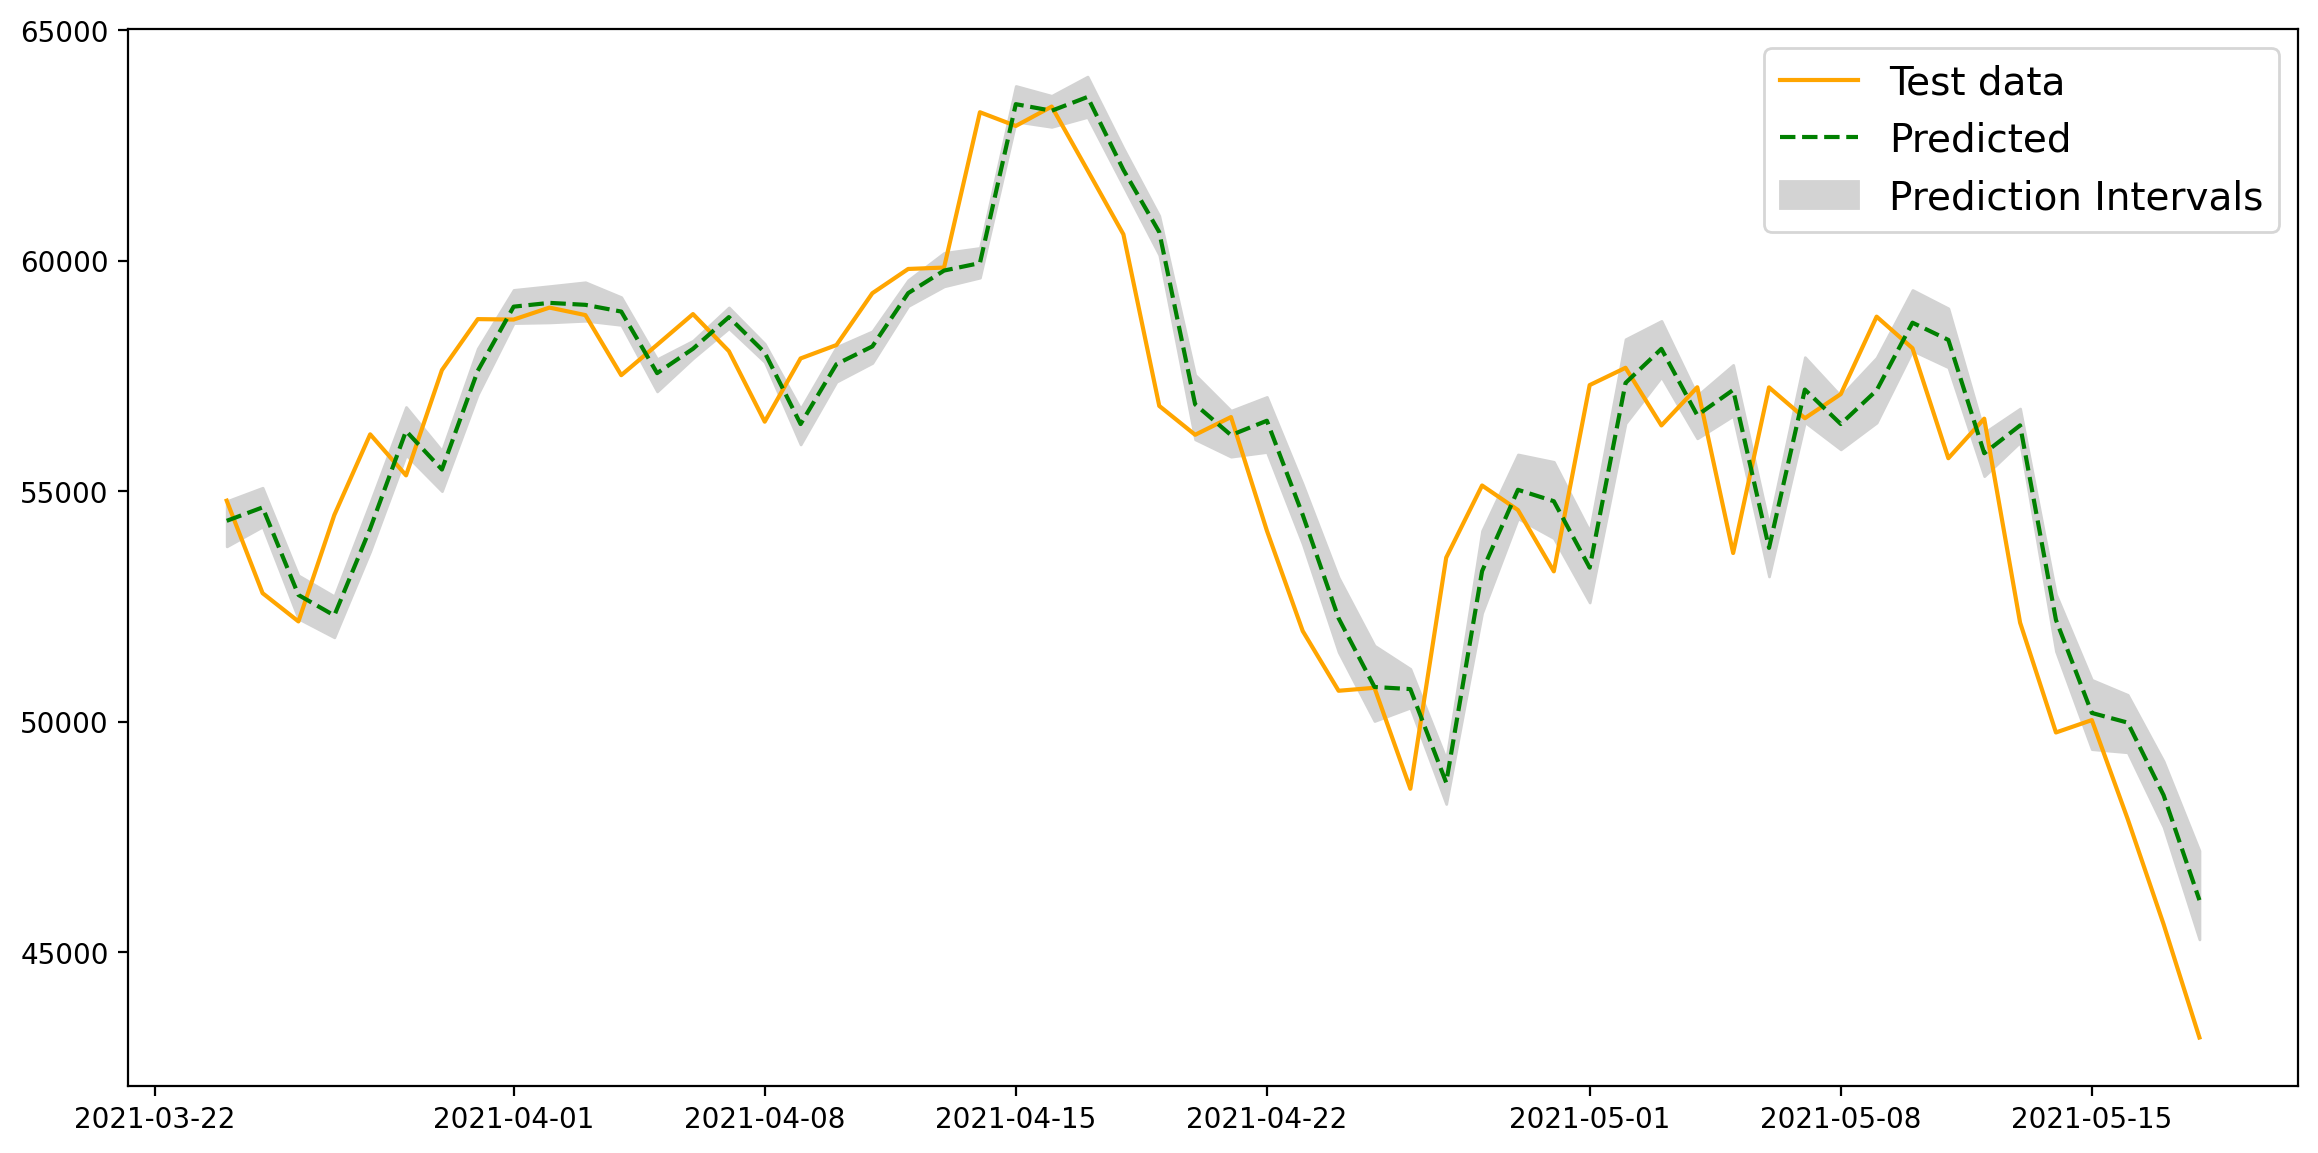

In [192]:
offset = 500
plt.figure(figsize=(14,7), dpi=200)
plt.plot(X_test.index[offset:], y_test[offset:],'orange', label='Test data')
plt.plot(X_test.index[offset:], median_ensemble_preds[offset:], 'g--', label='Predicted')
plt.fill_between(X_test.index[offset:],
                 (lower[offset:]),
                 (upper[offset:]),
                 color='#D3D3D3',
                 label='Prediction Intervals')
plt.legend(fontsize=14)

# Model 9: Making a model to predict into the future

## Setting up the dataset for prediction into the future.(Training with the full dataset)



In [193]:
df_block_windowed.head()

,Price,Block,Prices 1,Prices 2,Prices 3,Prices 4,Prices 5,Prices 6,Prices 7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [194]:
X_full = df_block_windowed.dropna().drop(['Block', 'Price'], axis=1).to_numpy()
y_full = df_block_windowed.dropna()['Price'].to_numpy()

In [195]:
len(X_full), len(y_full)

(2780, 2780)

In [196]:
bitcoin_features_full = tf.data.Dataset.from_tensor_slices(X_full)
bitcoin_labels_full = tf.data.Dataset.from_tensor_slices(y_full)
bitcoin_full = tf.data.Dataset.zip((bitcoin_features_full, bitcoin_labels_full))

In [197]:
BATCH_SIZE = 1024
bitcoin_full = bitcoin_full.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [198]:
bitcoin_full

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

## Building the model

In [199]:
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
    tf.keras.layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name='model_9')

model_9.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

history_9 = model_9.fit(bitcoin_full,
                        epochs=100,
                        verbose=0)


## Make predictions into the future

In [200]:
INTO_FUTURE = 14

In [201]:
def make_future_preds(values, model, into_future, window_size=WINDOW_SIZE):
  future_forecast = []
  last_window = values[-window_size:]

  for _ in range(into_future):
    preds = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(preds).numpy()}\n")

    future_forecast.append(tf.squeeze(preds).numpy())
    last_window = np.append(last_window, preds)[-WINDOW_SIZE:]

  return future_forecast

In [224]:
future_preds = make_future_preds(values=y_full, model=model_9, into_future=INTO_FUTURE)

1/1 [==============================] - 0s 55ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 59628.6875

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 59628.6875    ] -> Prediction: 66927.4375

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 59628.6875     66927.4375    ] -> Prediction: 65176.55859375

1/1 [==============================] - 0s 16ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 59628.6875     66927.4375     65176.55859375] -> Prediction: 54238.484375

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 59628.6875
 66927.4375     65176.55859375 54238.484375  ] -> Pr

### Plot time series into the future

In [221]:
def get_future_dates(start_date, into_future, offset=1):
  start_date = start_date + np.timedelta64(offset, 'D')
  future_date = start_date + np.timedelta64(into_future, 'D')
  return np.arange(start_date, future_date, dtype='datetime64[D]')

In [222]:
future_timesteps = get_future_dates(start_date=df.index[-1], into_future=INTO_FUTURE)

In [223]:
future_timesteps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [214]:
prices[-1]

43144.4712908603

In [225]:
len(future_preds), len(future_timesteps)

(14, 14)

In [226]:
df.index[-1]

Timestamp('2021-05-18 00:00:00')

In [227]:
future_timesteps_t = np.insert(future_timesteps, 0, df.index[-1])
future_preds_t = np.insert(future_preds, 0, prices[-1])

In [228]:
len(future_timesteps_t), len(future_preds_t)

(15, 15)

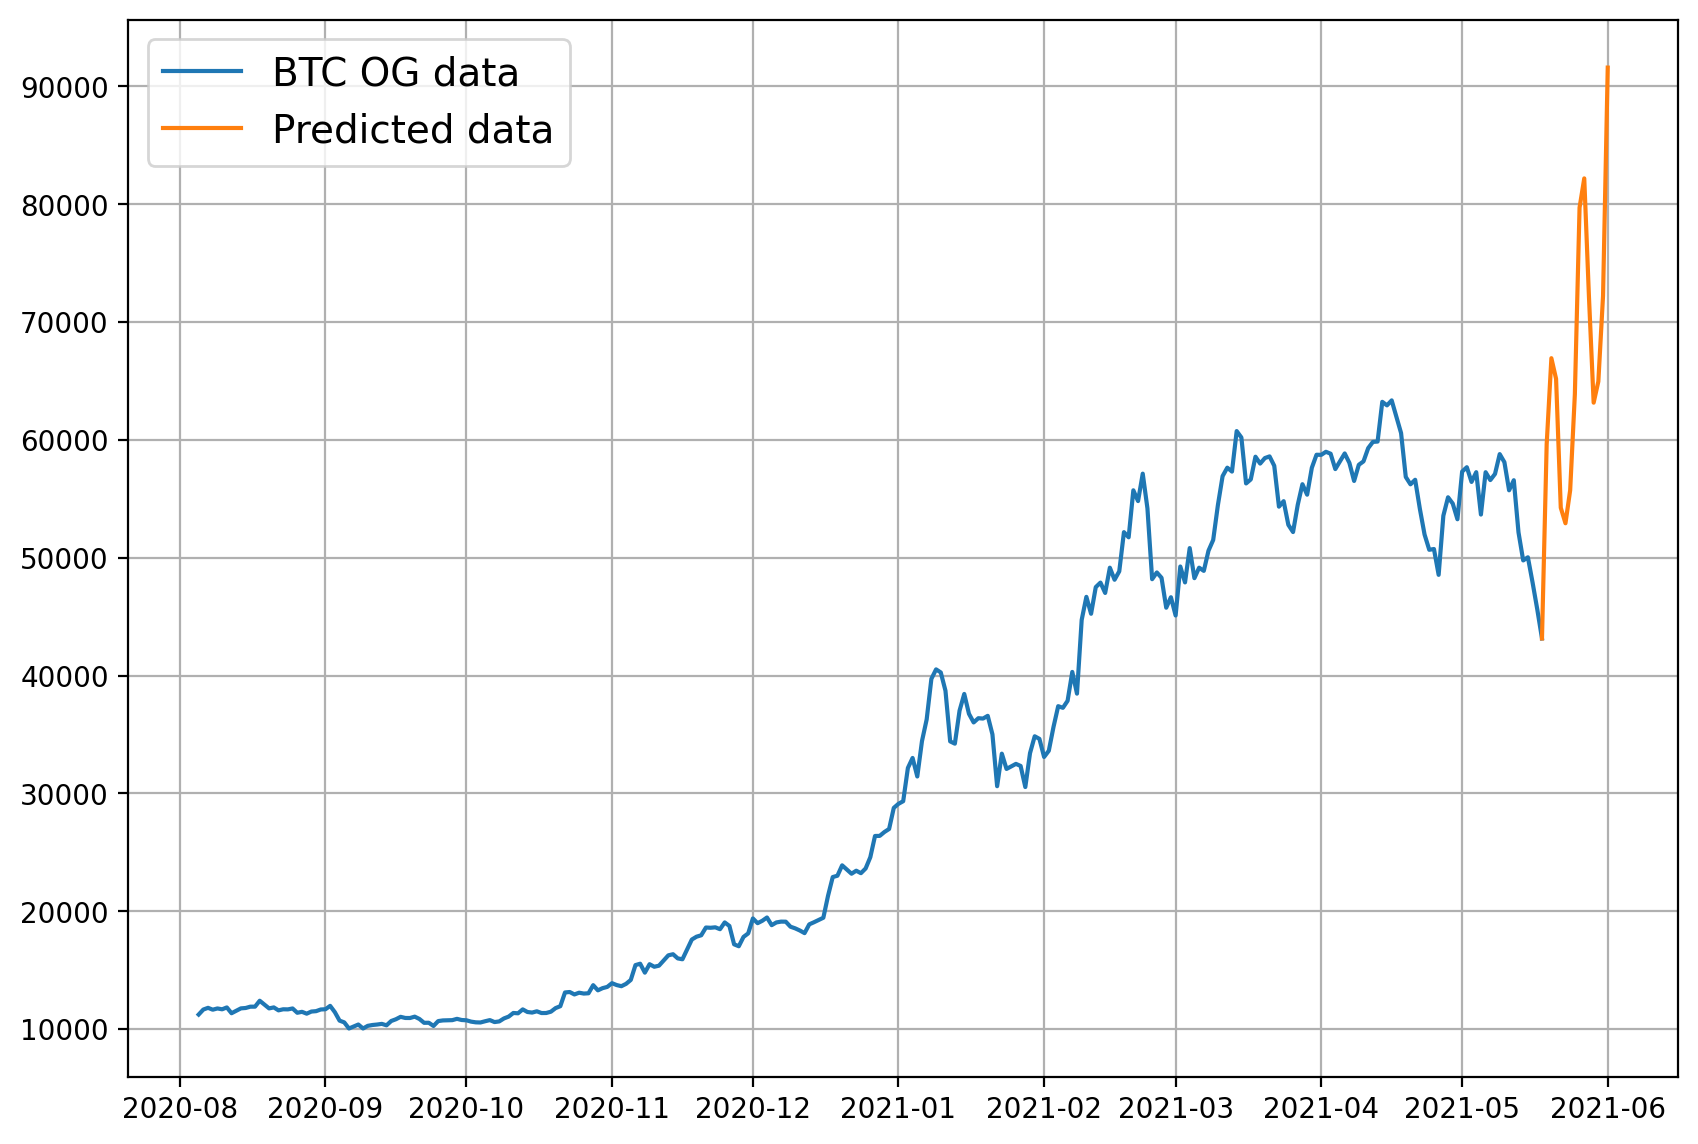

In [229]:
plt.figure(figsize=(10,7), dpi=200)
plot_time_series(df.index, prices, format='-', label='BTC OG data', start=2500)
plot_time_series(future_timesteps_t, future_preds_t, format='-', label='Predicted data')

# Model 10: Turkey Problem

## Visualizing the turkey data

In [230]:
turkey_data = prices.copy()
turkey_data[-1] = turkey_data[-1] / 100

In [231]:
turkey_data[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361,   431.44471291])

In [232]:
turkey_data_timesteps = df.index

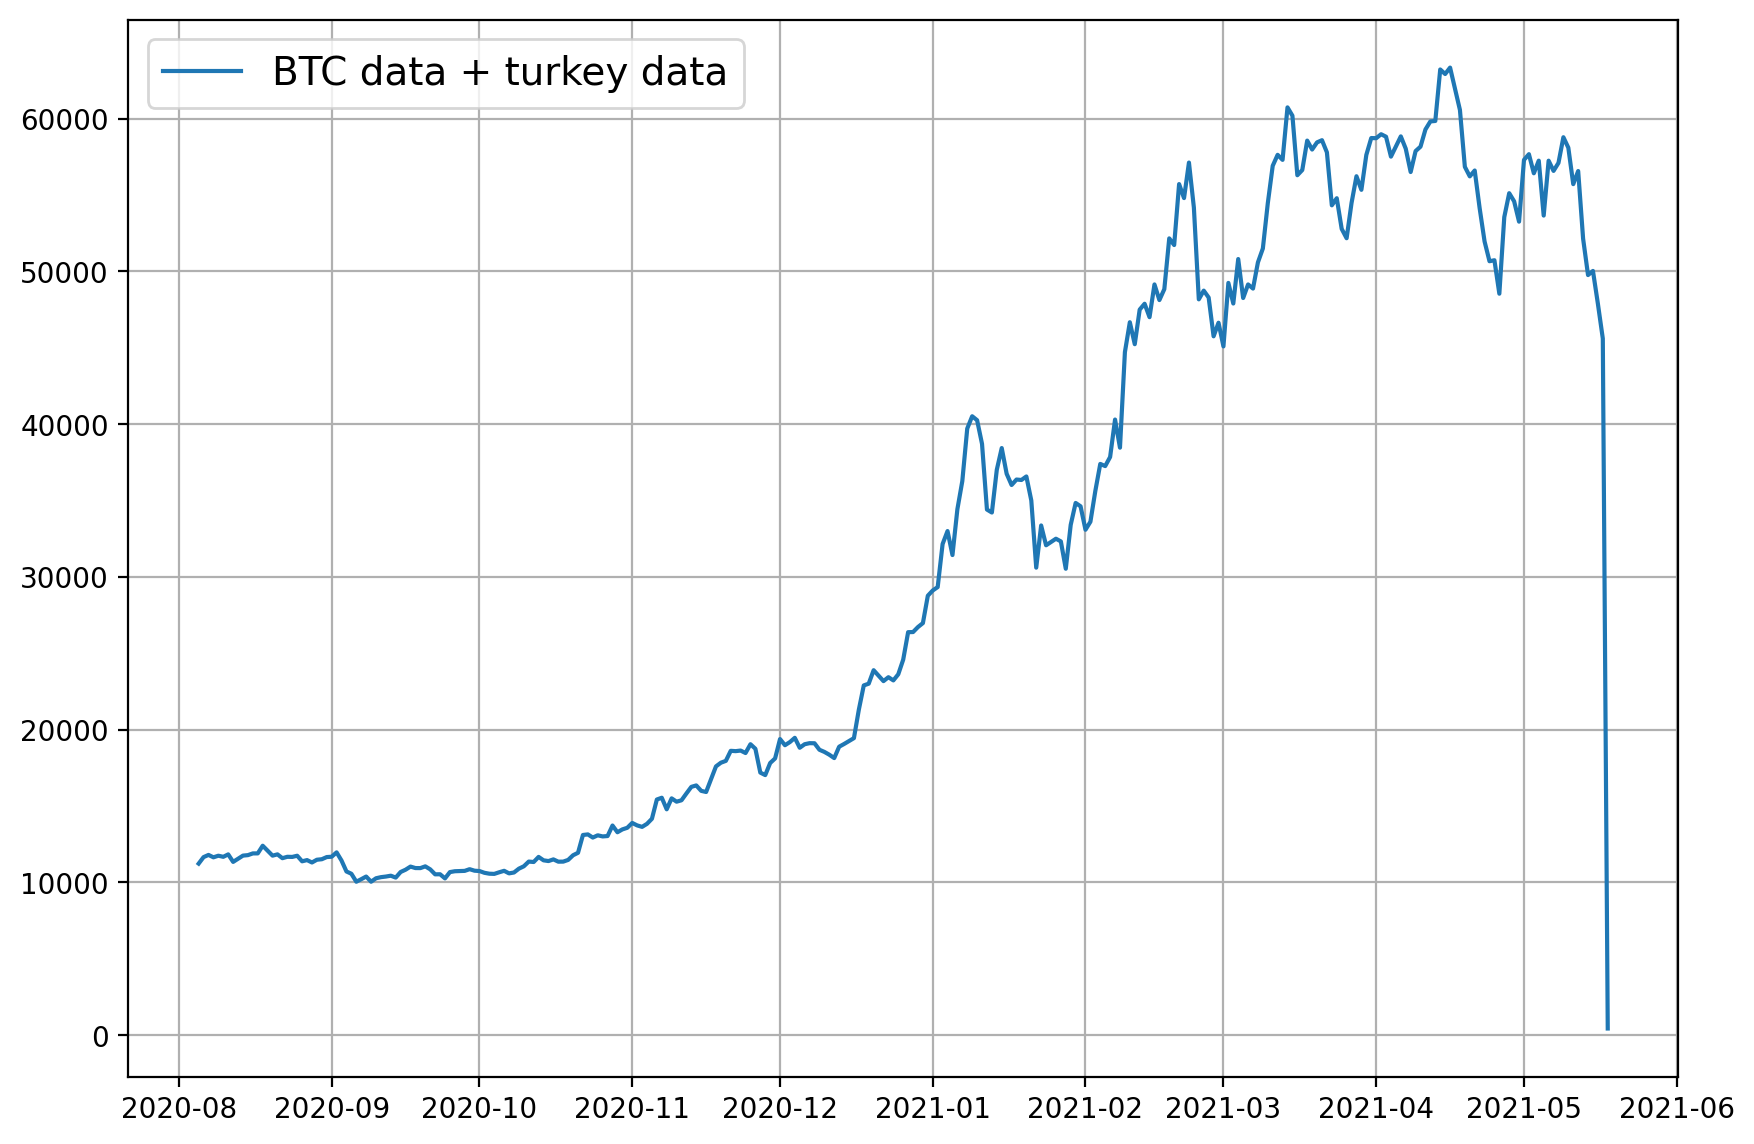

In [235]:
plt.figure(figsize=(10, 7), dpi=200)
plot_time_series(turkey_data_timesteps, turkey_data, start=2500, label='BTC data + turkey data', format='-')

In [236]:
WINDOW_SIZE = 7
HORIZON = 1

In [237]:
full_windows, full_labels = make_windows(turkey_data, window_size=WINDOW_SIZE, horizon=HORIZON)

In [238]:
test_size = int(len(turkey_data) * 0.8)

X_train_t, X_test_t, y_train_t, y_test_t = full_windows[:test_size], full_windows[test_size:], full_labels[:test_size], full_labels[test_size:]

In [239]:
len(X_train_t), len(X_test_t)

(2229, 551)

## Building the model to predict the turkey data

In [ ]:
model_10 = tf.keras.models.clone_model(model_1)
model_10._name = 'model_10'
model_10.compile(loss='mae',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['mae'])

history_10 = model